## Chapter 4: Vector Calculus for Mathematical Optimization

# 4.1 Taylor series

In this Section we take everything we have just learned about higher order derivatives to define the *Taylor Series* of a function, a fundamental tool for mathematical optimization.

In [13]:
# This code cell will not be shown in the HTML version of this notebook
#imports from custom library
import sys
sys.path.append('../../')
import autograd.numpy as np
import matplotlib.pyplot as plt
from mlrefined_libraries import calculus_library as calclib

# this is needed to compensate for %matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib notebook
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

#### <span style="color:#a50e3e;">Example 1. </span> A simple example illustrating how to use [autograd](https://github.com/HIPS/autograd)

Note: in the last few Sections we have described in significant detail how you can build your own Automatic Differentiator calculator (and will have more to say about them in future Sections as well).  However in the interest of making this text as modular as possible, starting in this Section we will largely use the Automatic Differentiation calculator [autorad](https://github.com/HIPS/autograd) - a free professioally built and maintained derivative calculator that works with a large swath of the ``Numpy`` based library - to work examples so that Sections like this can be read / played with independently of any Sections on Automatic Differentiation and so you need not have to build your own / understand Automatic Differentiation in such fine grained detail in order to use it in future Chapters. 

 Here we show off the basic usage of the autograd calculator.  First we can define any math function we like - for example

\begin{equation}
g(w) = \text{tanh}(w)
\end{equation}

We express this function using ``Numpy`` - or more specifically a ``autograd``-wrapped version of ``numpy``.

In [2]:
# import statement for autograd wrapped numpy
import autograd.numpy as np

In [3]:
# define a test math function - note autograd-wrapped numpy
# is being used here
g = lambda w: np.tanh(w)

Autograd is an Automatic Differentiator calculator as described in Chapter 4 - meaning that we can use it produce a programmatic function (i.e., a program that allows us to evaluate the derivative(s) of a function for any desired input) that computes the derivative(s) of any mathematical function that can be expressed using ``Numpy`` functionalities.  

Practically speaking, we can use ``autograd`` by importing the Automatic Differentiator from the autograd library, and then shoving our function above through it.

For this demonstration we will use the ``autograd`` function ``grad``, which is imported below.  This takes in the function we wish to differentiate and returns the computation graph representing its derivative(s) (which we can then evaluate however we please).  

In [4]:
# import automatic differentiation calculator from autograd library
from autograd import grad

In [5]:
# compute the derivative of our input function
dgdw = grad(g)

In the next cell we demonstrate how to now use the derivative function ``dgdw`` - that is how to evaluate the derivative at a point.

In [6]:
# test input
w = 1.2

# evaluate cost function and gradient at this input
cost_val = g(w)
grad_val = dgdw(w)

# print out cost function and gradient evaluations
print ('g(' + str(w) + ') = ' + str(cost_val))
print ('dgdw(' + str(w) + ') = ' + str(grad_val))

g(1.2) = 0.833654607012
dgdw(1.2) = 0.305019996207


This derivative function ``dgdw`` is something we can call / evaluate just as we can the original function ```g```.  Below we evaluate both the function and it's derivative over a fine range of values, and plot the results.

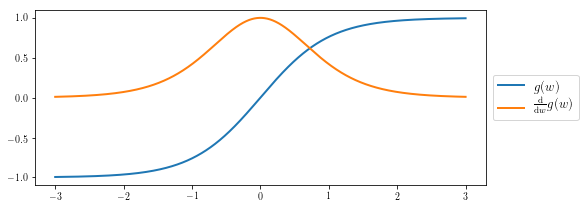

In [7]:
# define set of points over which to plot function and derivative
w = np.linspace(-3,3,2000)

# evaluate the input function g and derivative dgdw over the input points
gvals = [g(v) for v in w]
dgvals = [dgdw(v) for v in w]

# plot the function and derivative
fig = plt.figure(figsize = (7,3))
plt.plot(w,gvals,linewidth=2)
plt.plot(w,dgvals,linewidth=2)
plt.legend(['$g(w)$',r'$\frac{\mathrm{d}}{\mathrm{d}w}g(w)$'],loc='center left', bbox_to_anchor=(1, 0.5),fontsize = 13)
plt.show()

We can compute higher order derivatives of our input function by using the same autograd functionality, only this time plugging in the derivative ```dgdw```.  Doing this once gives us the second derivative as shown below.

In [8]:
# compute the second derivative of our input function
dgdw2 = grad(dgdw)

We can then plot the input function, as well as the first and second derivatives, as shown below.

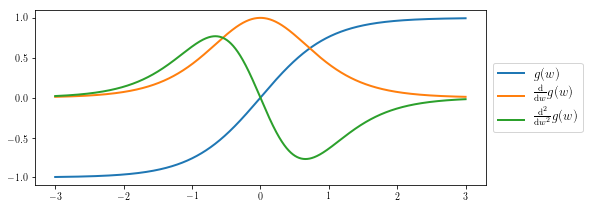

In [9]:
# define set of points over which to plot function and first two derivatives
w = np.linspace(-3,3,2000)

# evaluate the input function g, first derivative dgdw, and second derivative dgdw2 over the input points
gvals = [g(v) for v in w]
dgvals = [dgdw(v) for v in w]
dg2vals = [dgdw2(v) for v in w]

# plot the function and derivative
fig = plt.figure(figsize = (7,3))
plt.plot(w,gvals,linewidth=2)
plt.plot(w,dgvals,linewidth=2)
plt.plot(w,dg2vals,linewidth=2)
plt.legend(['$g(w)$',r'$\frac{\mathrm{d}}{\mathrm{d}w}g(w)$',r'$\frac{\mathrm{d}^2}{\mathrm{d}w^2}g(w)$'],loc='center left', bbox_to_anchor=(1, 0.5),fontsize = 13)
plt.show()

And we can keep going - computing higher and higher order derivatives - using the same process.

---

**A note on the ``grad`` method**  Above you may notice that the derivative function ``dgdw`` we have constructed returns only the derivative evaluation, and not the function evaluation itself (we have computed this separately above).  However as described in the previous Chapter Automatic Differentiator calculators always *simultaneously* compute the value of the evaluation of the input along with the evaluation of the derivative.  So what is going on here, why do are we needing to (re) compute the function evaluation ourselves?  Well the function evaluation is indeed being computed 'under the hood' of ``autograd``, it is simply not being returned via the ``grad`` method.  This is a design choice made by the authors of ``autograd`` to keep the interface of ``grad`` - their introductary Automatic Differentiation method - easy to pick up and use for a wide audience.  

There is another ``autograd`` method called ``value_and_grad`` that returns everything -  both the derivative(s) and function evaluations - which we will use later when the need to re-compute function evaluations becomes significant (one can view the entire list of ``autograd`` [methods available here](https://github.com/HIPS/autograd/blob/master/autograd/differential_operators.py).  For now this is not an issue, and so we will use ``grad`` to ensure that the mathematical formulae we discuss matches our ``Python`` code as closely as possible.


## 4.1.1  Linear approximation is only the beginning

We began our discussion of derivatives in Chapter 3 by defining the derivative at a point as the slope of the tangent line to a given input function.  For a function $g(w)$ we then formally described the tangent line at a point $w^0$ as 

\begin{equation}
h(w) = g(w^0) + \frac{\mathrm{d}}{\mathrm{d}w}g(w^0)(w - w^0)
\end{equation}

with the slope here given by the derivative $\frac{\mathrm{d}}{\mathrm{d}w}g(w^0)$.  The justification for examining the tangent line / the derivative to begin with is fairly straight forward - locally (close to the point $w^0$) the tangent line looks awfully similar to the function, and so if we want to better understand $g$ near $w^0$ we can just as well look at the tangent line.  This makes our lives a lot easier because a line is a fairly simple object - especially when compared to an arbitrary function $g$ - and so understanding the tangent line is always a simple affair.

Below we plot an example function with tangent line defined by the derivative at the point $w^0 = 1$.

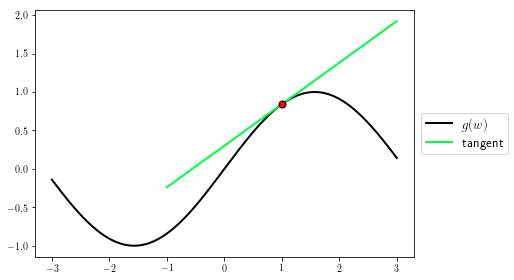

In [10]:
# create area over which to evaluate everything
w = np.linspace(-3,3,2000); w_0 = 1.0; w_=np.linspace(-2+w_0,2+w_0,2000);

# define and evaluate the function, define derivative
g = lambda w: np.sin(w); dgdw = grad(g);
gvals = [g(v) for v in w]

# create tangent line at a point w_0
tangent = g(w_0) + dgdw(w_0)*(w_ - w_0)

# plot the function and derivative 
fig = plt.figure(figsize = (6,4))
plt.plot(w,gvals,c = 'k',linewidth=2,zorder = 1)
plt.plot(w_,tangent,c = [0,1,0.25],linewidth=2,zorder = 2)
plt.scatter(w_0,g(w_0),c = 'r',s=50,zorder = 3,edgecolor='k',linewidth=1)
plt.legend(['$g(w)$','tangent'],loc='center left', bbox_to_anchor=(1, 0.5),fontsize = 13)
plt.show()

If we study the form of our tangent line $h(w)$ closely, we can define in precise mathematical terms how it matches the function $g$.  Notice first of all that the tangent line takes on the same value as the function $g$ at the point $w^0$.  Plugging in $w^0$ into $h$ we can see that

\begin{equation}
h(w^0) = g(w^0) + \frac{\mathrm{d}}{\mathrm{d}w}g(w^0)(w^0 - w^0) = g(w^0)
\end{equation}

Next notice that the first derivative value of these two functions match as well.  That is if we take the first derivative of $h$ with respect to $w$ - applying the derivative rules for elementary functions/operations we have seen in the last several Sections - we can see that

\begin{equation}
\frac{\mathrm{d}}{\mathrm{d}w}h(w^0) = \frac{\mathrm{d}}{\mathrm{d}w}\left (g(w^0) + \frac{\mathrm{d}}{\mathrm{d}w}g(w^0)(w - w^0)\right) = \frac{\mathrm{d}}{\mathrm{d}w}\left ( \frac{\mathrm{d}}{\mathrm{d}w}g(w^0)(w - w^0)\right) = \frac{\mathrm{d}}{\mathrm{d}w}g(w^0)
\end{equation}

In short, with the tangent line $h$ matches $g$ exactly that at $w^0$ both the function value and derivative value are equal.

\begin{array}
\
1. \,\,\, h(w^0) = g(w^0) \\
2. \,\,\, \frac{\mathrm{d}}{\mathrm{d}w}h(w^0) = \frac{\mathrm{d}}{\mathrm{d}w}g(w^0) \\
\end{array}

What if we turned this around - say we wanted to find a line that satisfies these two properties.  We start with a general line

\begin{equation}
h(w) = a_0 + a_1(w - w^0)
\end{equation}

with unknown coefficients $a_0$ and $a_1$ - and we want to determine the right value for these coefficients so that the line satisfy these two properties.  What would we do?  Well, since the two criteria above constitute a *system of equations* we can compute the left hand side of both and solve for the correct values of $a_0$ and $a_1$.  Computing the left hand side of each - where $h$ is our general line - we end up with a trivial system of equations to solve for both unknowns simultaneously

\begin{array}
\
h(w^0) = a_0  = g(w^0) \\
\frac{\mathrm{d}}{\mathrm{d}w}h(w^0) = a_1 = \frac{\mathrm{d}}{\mathrm{d}w}g(w^0)
\end{array}

and behold, the coefficients are precisely those of the tangent line!  

In other words, if we start with a general line and determine parameter values that satisfy the two criteria above we could have derived the tangent line from first principles. 

## 4.1.2  From tangent line to tangent quadratic

Given that the function and derivative values of the tangent line match those of its underlying function, can we do better?  Can we find a simple function that matches the function value, first derivative, *and* the second derivative value of $g$ at the point $w_0$?  In other words, is it possible to determine a simple function $h$ that satisfies

\begin{array}
\
1. \,\,\, h(w^0) = g(w^0) \\
2. \,\,\, \frac{\mathrm{d}}{\mathrm{d}w}h(w^0) = \frac{\mathrm{d}}{\mathrm{d}w}g(w^0) \\
3. \,\,\, \frac{\mathrm{d}^2}{\mathrm{d}w^2}h(w^0) = \frac{\mathrm{d}^2}{\mathrm{d}w^2}g(w^0) \\
\end{array} 

Notice how a (tangent) line $h$ can only satisfy the first two of these properties and never the third, since it being a degree 1 polynomial $\frac{\mathrm{d}^2}{\mathrm{d}w^2}h(w) = 0$ for all $w$.  This fact implies that we need *at least* a degree 2 polynomial to satisfy all three criteria, since the second derivative of a degree 2 polynomial need not be equal to zero. 

What sort of degree 2 polynomial could satisfy these three criteria?  Starting with a general degree 2 polynomial 

\begin{equation}
h(w) = a_0 + a_1(w - w^0) + a_2(w - w^0)^2
\end{equation}

with unknown coefficients $a_0$, $a_1$, and $a_2$, we can evaluate the left hand side of each criterion forming a system of 3 equations and solve for these coefficients.


\begin{array}
\
h(w^0) = a_0 = g(w^0) \\
\frac{\mathrm{d}}{\mathrm{d}w}h(w^0) = a_1 = \frac{\mathrm{d}}{\mathrm{d}w}g(w^0) \\
 \frac{\mathrm{d}^2}{\mathrm{d}w^2}h(w^0) = 2a_2 = \frac{\mathrm{d}^2}{\mathrm{d}w^2}g(w^0)\\
\end{array}

With all of our coefficients solved we have a degree 2 polynomial that satisfies the three desired criteria 

\begin{equation}
h(w) = g(w^0) + \frac{\mathrm{d}}{\mathrm{d}w}g(w^0)(w - w^0) +  \frac{1}{2}\frac{\mathrm{d}^2}{\mathrm{d}w^2}g(w^0)(w - w^0)^2
\end{equation}

This is one step beyond the tangent line - a tangent quadratic function - note that the first two terms are indeed the tangent line itself.  We plot an example of the above below in the next Python cell.  Notice how this degree 2 polynomial does a much better job of matching the underlying function around the point $w^0$ than does the tangent line, which is by design: its value, along with its first and second derivative value, match the underlying function's at $w^0$.

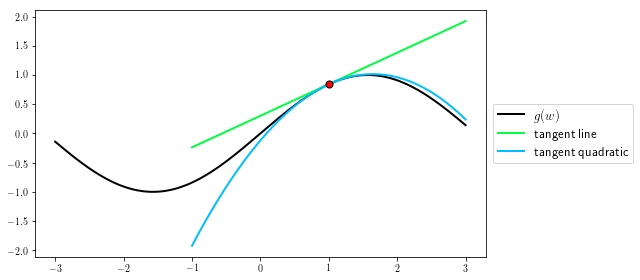

In [11]:
# create area over which to evaluate everything
w = np.linspace(-3,3,2000); w_0 = 1.0; w_=np.linspace(-2+w_0,2+w_0,2000);

# define and evaluate the function, define derivative
g = lambda w: np.sin(w); dgdw = grad(g); dgdw2 = grad(dgdw);
gvals = [g(v) for v in w]

# create tangent line and quadratic
tangent = g(w_0) + dgdw(w_0)*(w_ - w_0)
quadratic = g(w_0) + dgdw(w_0)*(w_ - w_0) + 0.5*dgdw2(w_0)*(w_ - w_0)**2

# plot the function and derivative 
fig = plt.figure(figsize = (7,4))
plt.plot(w,gvals,c = 'k',linewidth=2,zorder = 1)
plt.plot(w_,tangent,c = [0,1,0.25],linewidth=2,zorder = 2)
plt.plot(w_,quadratic,c = [0,0.75,1],linewidth=2,zorder = 2)
plt.scatter(w_0,g(w_0),c = 'r',s=50,zorder = 3,edgecolor='k',linewidth=1)
plt.legend(['$g(w)$','tangent line','tangent quadratic'],loc='center left', bbox_to_anchor=(1, 0.5),fontsize = 13)
plt.show()

## 4.1.3  Building better and better local approximations

Having derived this quadratic based on our reflection on the tangent line, one could think of going one step further.  That is finding a simple function $h$ that satisfies even one more condition than the quadratic 

\begin{array}
\
1. \,\,\, h(w^0) = g(w^0) \\
2. \,\,\, \frac{\mathrm{d}}{\mathrm{d}w}h(w^0) = \frac{\mathrm{d}}{\mathrm{d}w}g(w^0) \\
3. \,\,\, \frac{\mathrm{d}^2}{\mathrm{d}w^2}h(w^0) = \frac{\mathrm{d}^2}{\mathrm{d}w^2}g(w^0) \\
4. \,\,\, \frac{\mathrm{d}^3}{\mathrm{d}w^3}h(w^0) = \frac{\mathrm{d}^3}{\mathrm{d}w^3}g(w^0) \\
\end{array} 

Noting that no degree 2 polynomial could satisfy this last condition, since its third derivative is always equal to zero, we could seek out a degree 3 polynomial.  Using the same analysis as above - setting up the corresponding system of equations based on a generic degree 3 polynomial - leads to the conclusion that the following does indeed satisfy all of the criteria above

\begin{equation}
h(w) = g(w^0) + \frac{\mathrm{d}}{\mathrm{d}w}g(w^0)(w - w^0) +  \frac{1}{2}\frac{\mathrm{d}^2}{\mathrm{d}w^2}g(w^0)(w - w^0)^2 + \frac{1}{3\times2}\frac{\mathrm{d}^3}{\mathrm{d}w^3}g(w^0)(w - w^0)^3
\end{equation}

This is an even better approximation of $g$ near the point $w^0$, since it contains more of the function's derivative information there.

And of course we could keep going.  Setting up the corresponding set of $N+1$ criteria - the first demanding that $h(w^0) = g(w^0)$ and the remaining $N$ demanding that the first $n$ derivatives of $h$ match those of $g$ at $w^0$ - leads to the construction of degree $N$ polynomial

\begin{equation}
h(w^0) + g(w^0) + \sum_{n=1}^{N} \frac{1}{n!}\frac{\mathrm{d}^n}{\mathrm{d}w^n}g(w^0)(w - w^0)^n
\end{equation}

Notice how setting $N=1$ recovers the tangent line, $N=2$ the tangent quadratic, etc.,

This general degree $N$ polynomial is called the *Taylor Series* of $g$ at the point $w^0$.  It is *the* degree $N$ polynomial that matches $g$ as well as its first $N$ derivatives at the point $w^0$, and therefore approximates $g$ near this point better and better as we increase $N$.

> The degree $N$ polynomial $h(w^0) + g(w^0) + \sum_{n=1}^{N} \frac{1}{n!}\frac{\mathrm{d}^n}{\mathrm{d}w^n}g(w^0)(w - w^0)^n$ is called the Taylor Series of $g$ at the point $w_0$. 

We illustrate the first four Taylor Series polynomials for a user-defined input function below, animated over a range of values of the input function.  You can use the slider to shift the point at which each approximation is made back and forth across the input range.  


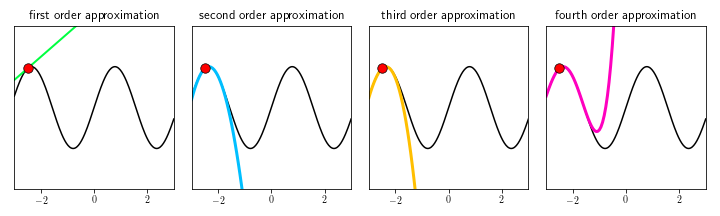
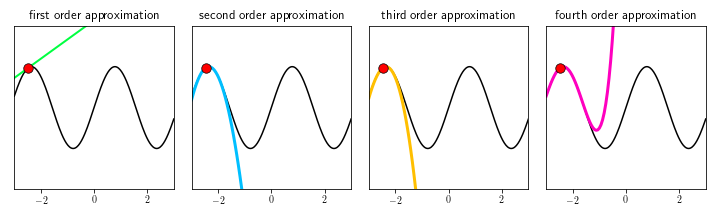
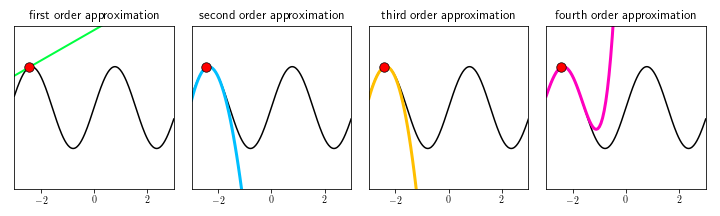
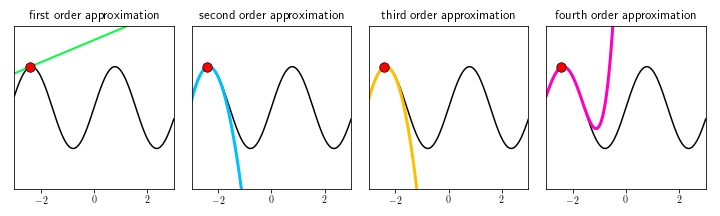
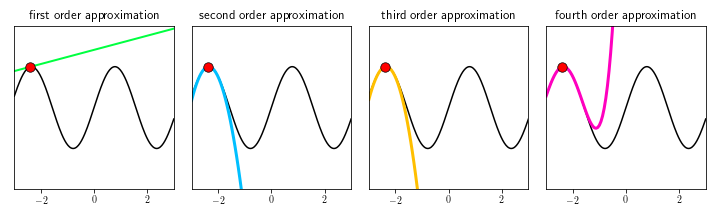
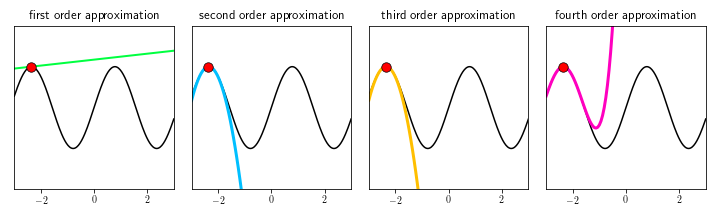
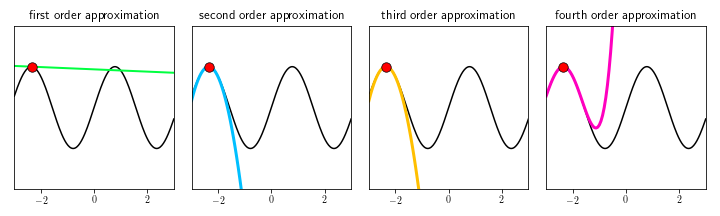
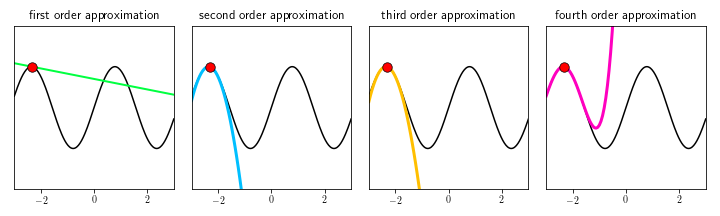
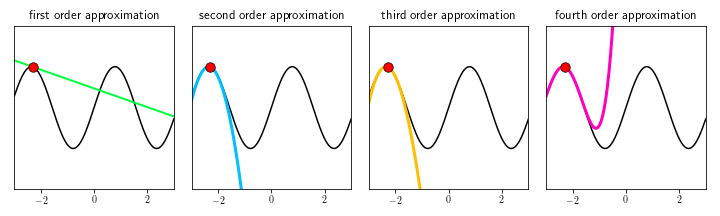
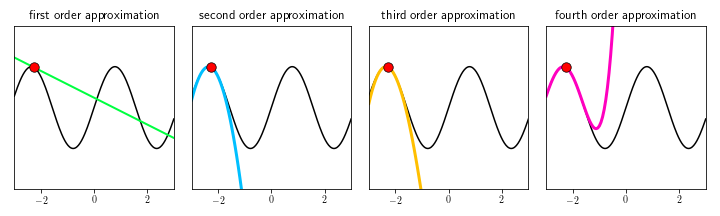
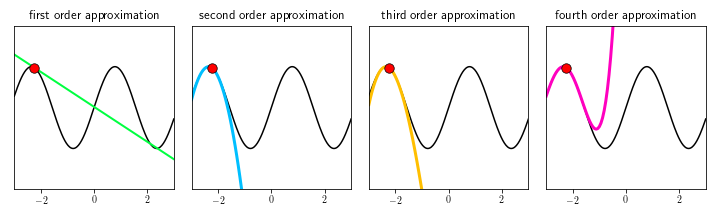
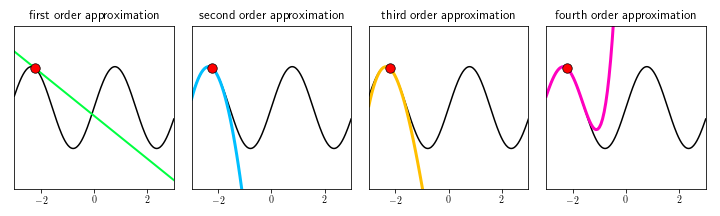
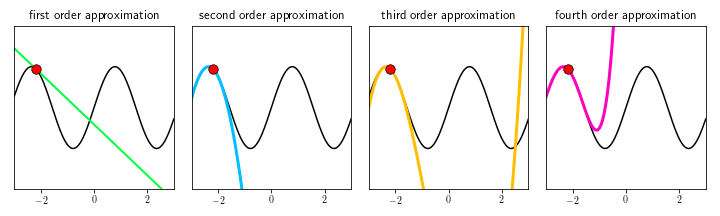
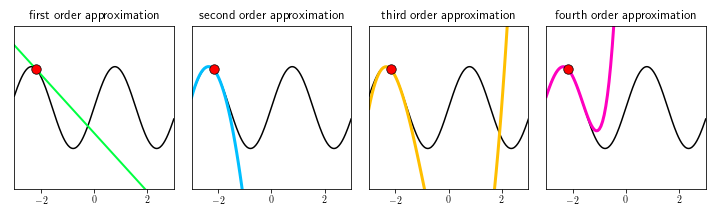
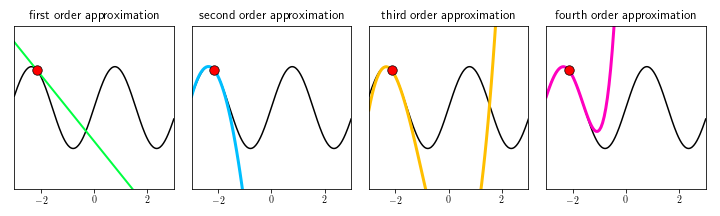
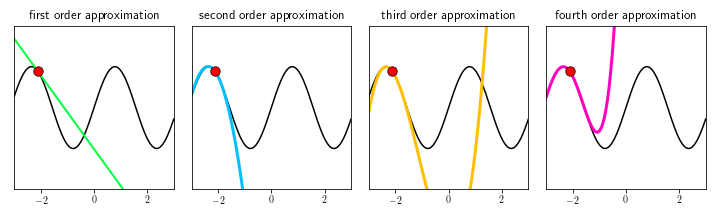
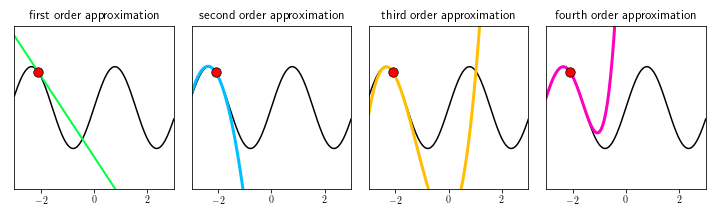
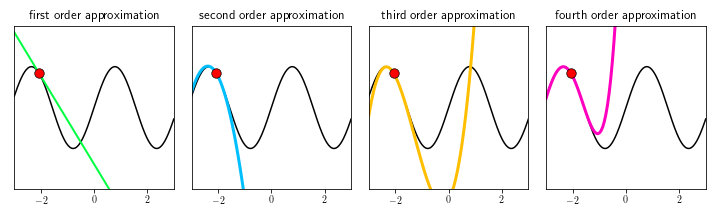
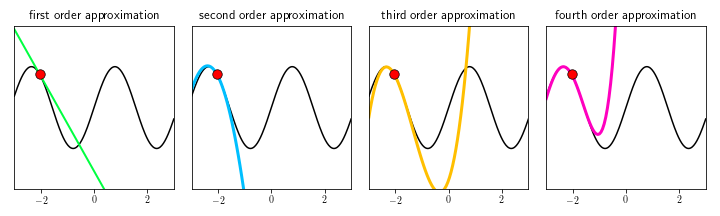
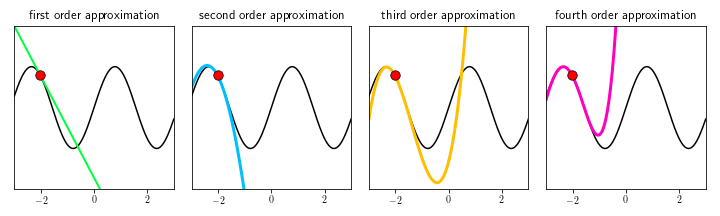
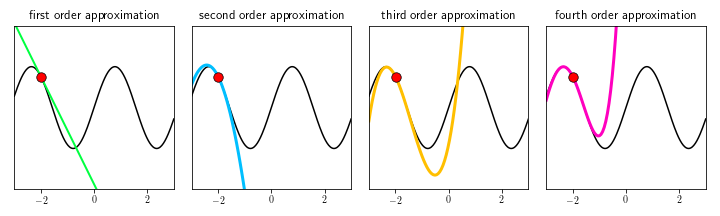
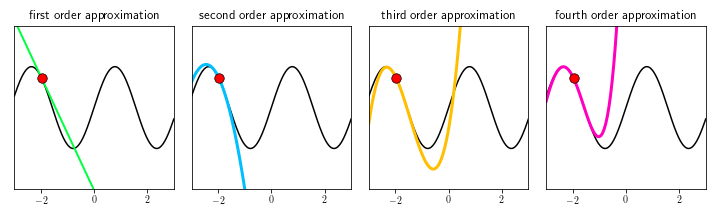
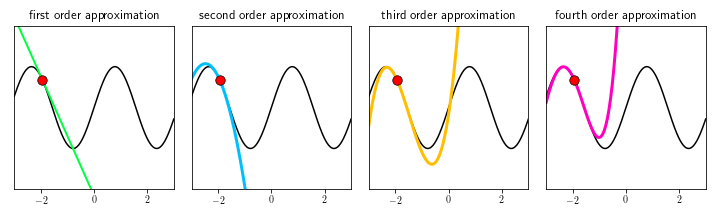
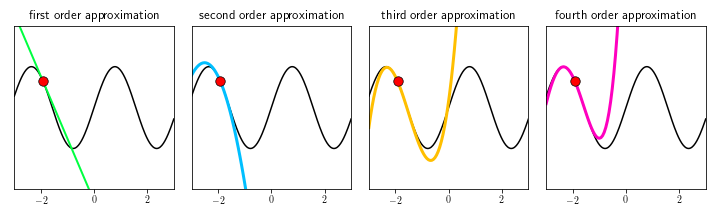
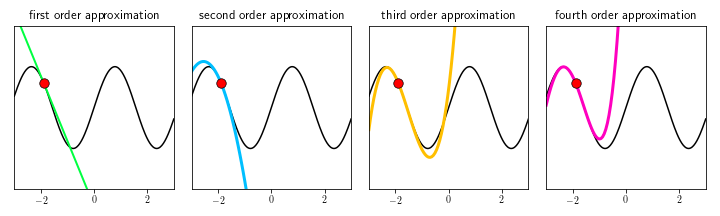
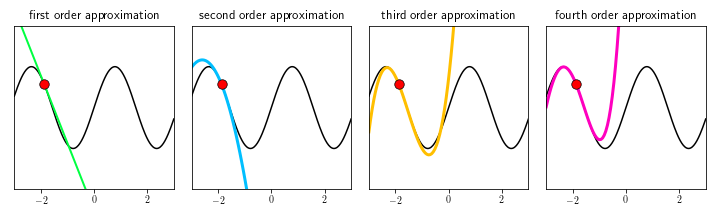
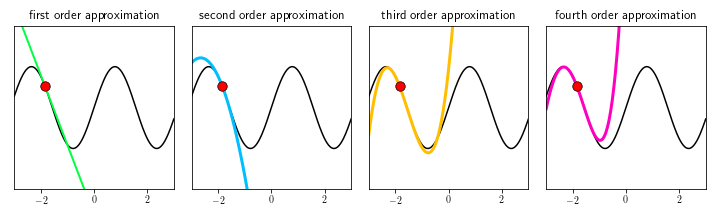
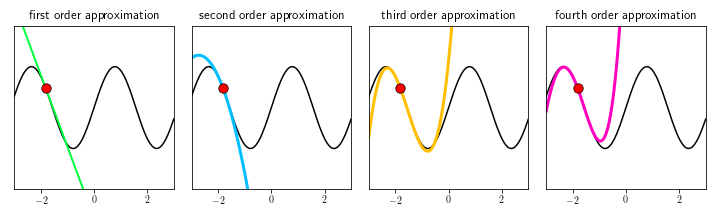
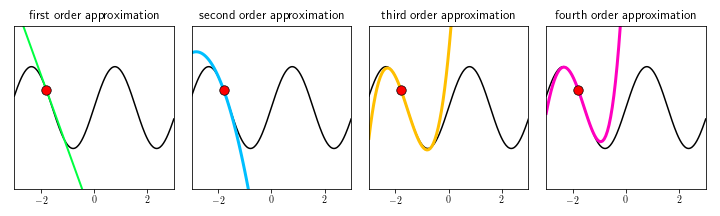
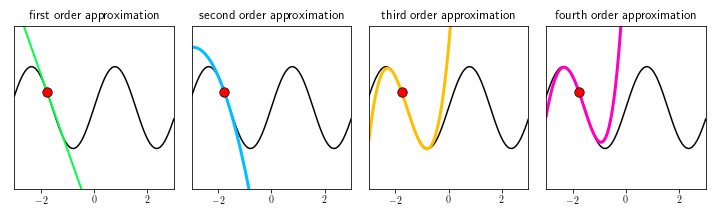
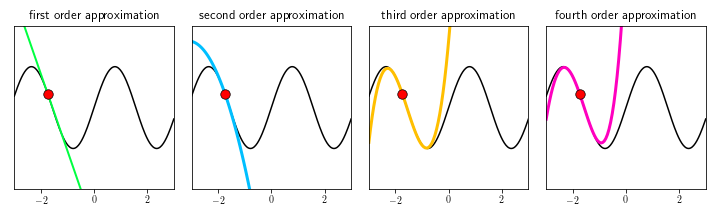
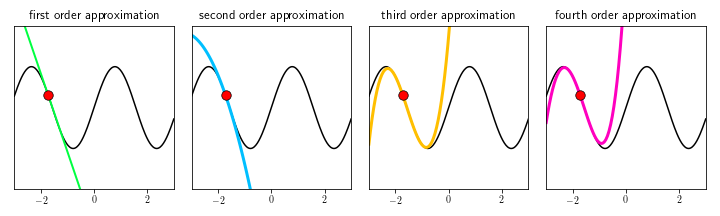
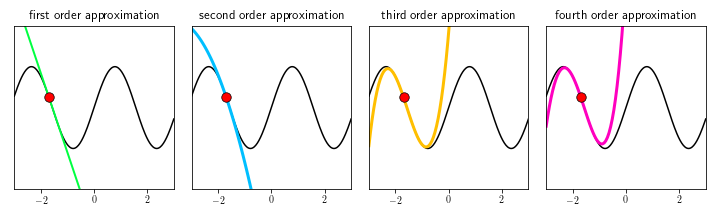
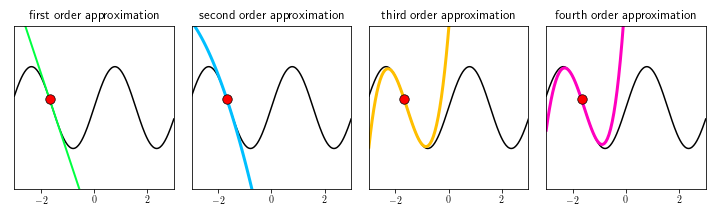
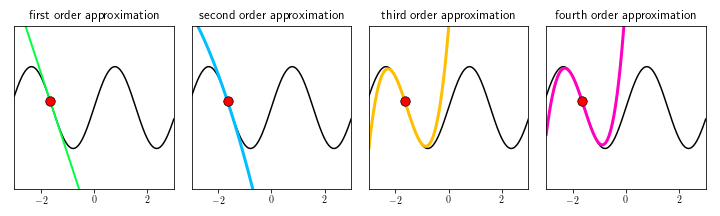
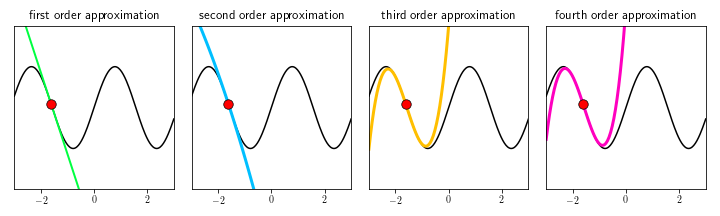
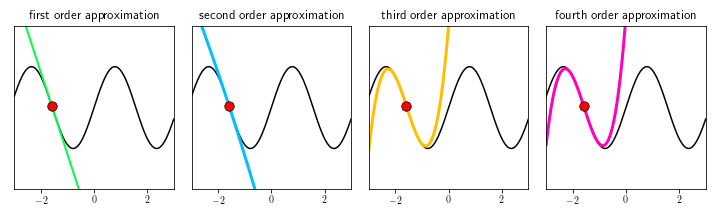
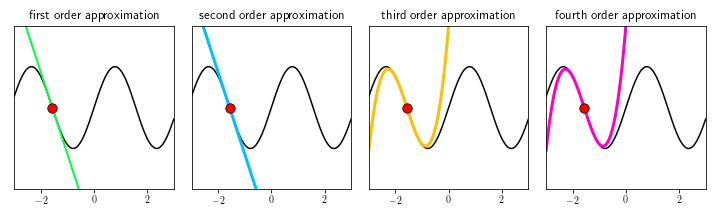
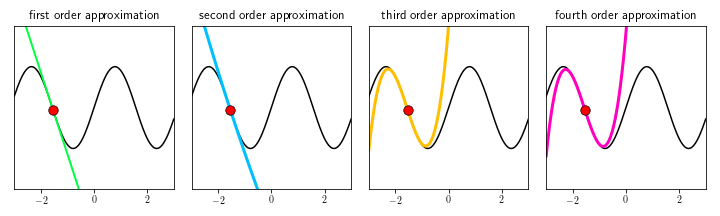
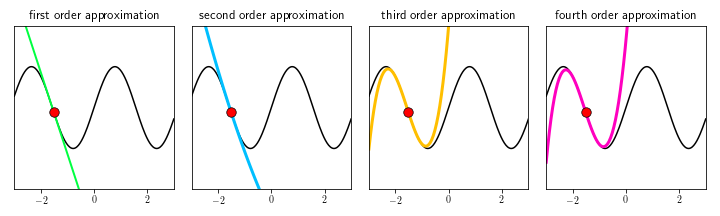
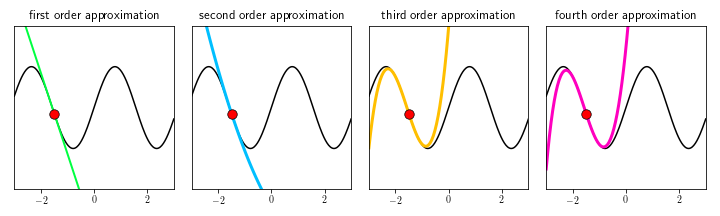
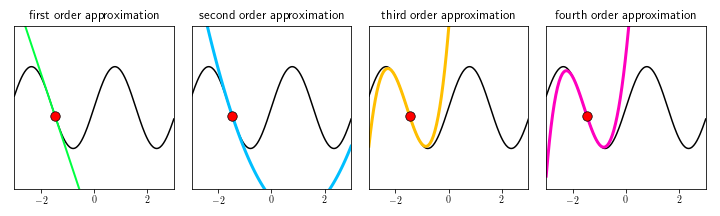
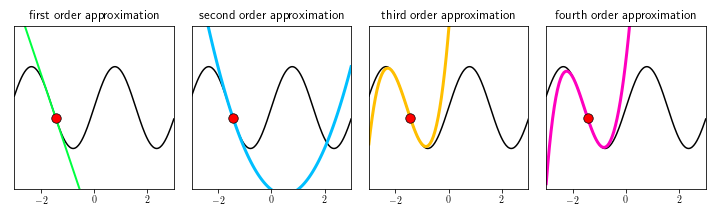
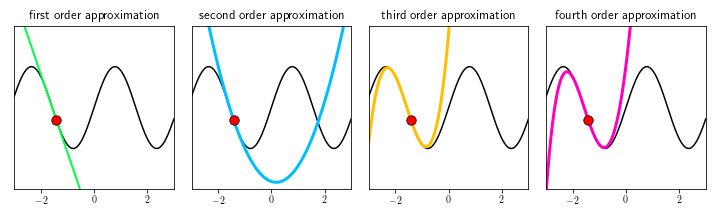
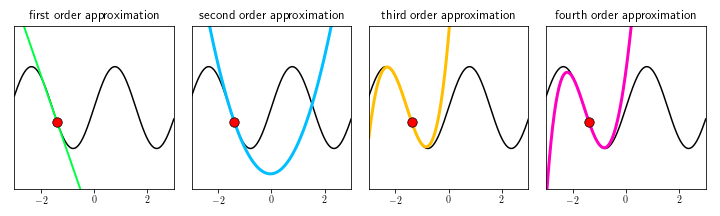
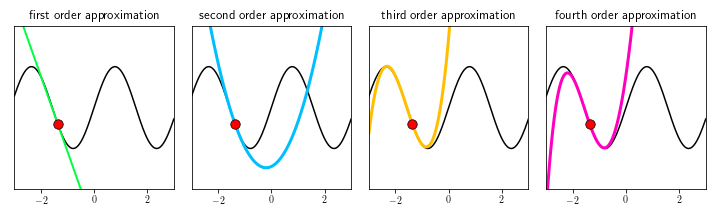
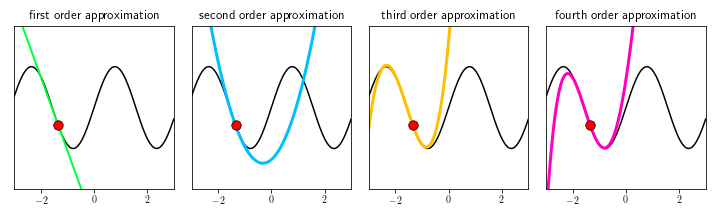
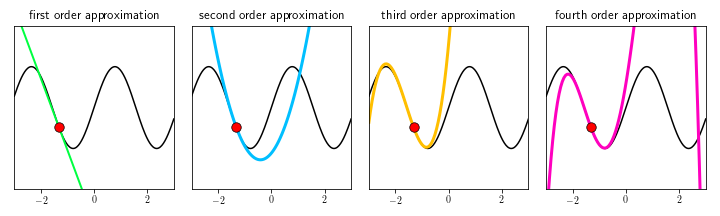
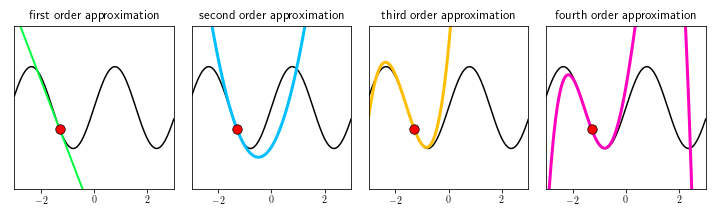
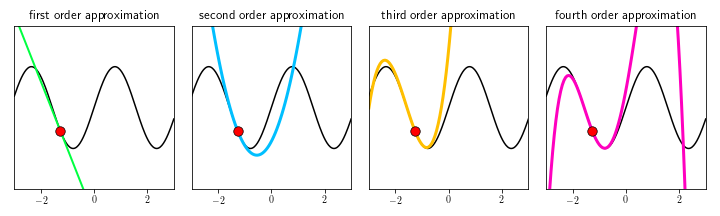
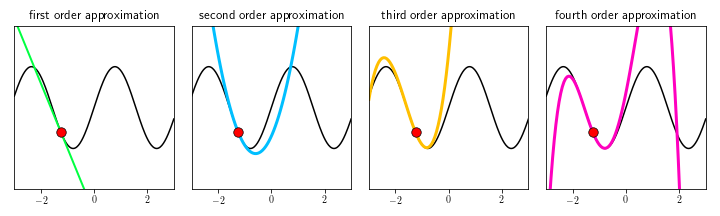
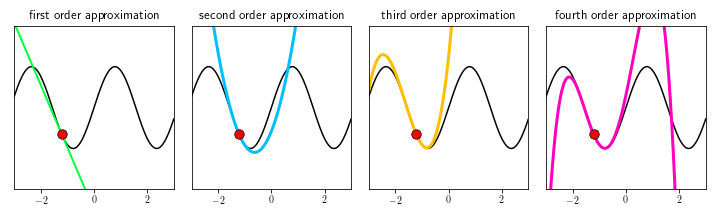
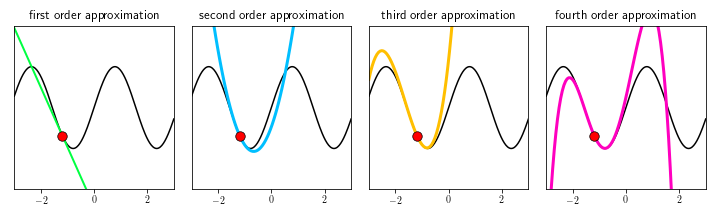
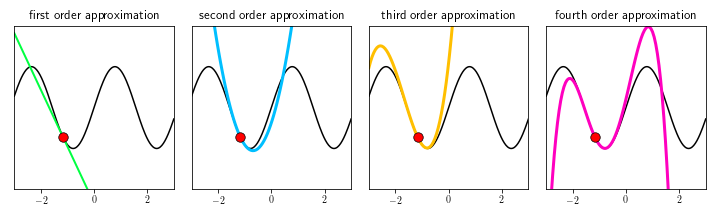
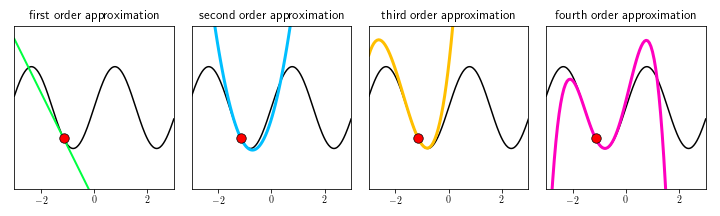
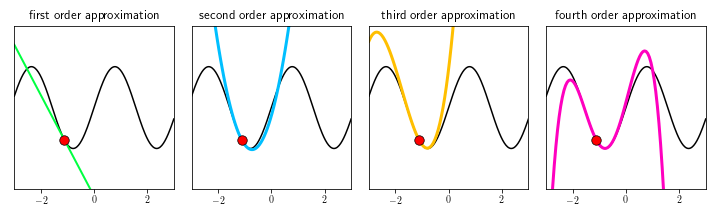
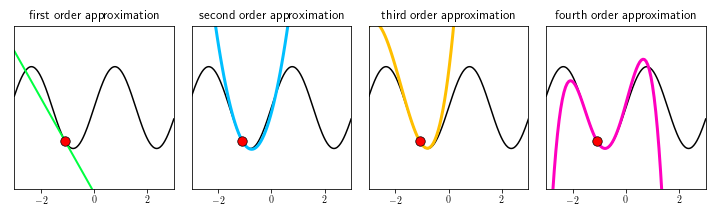
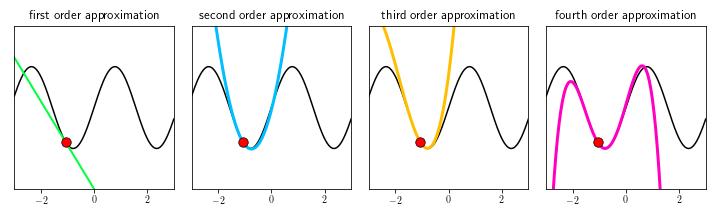
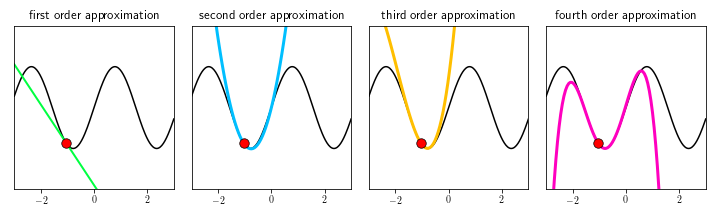
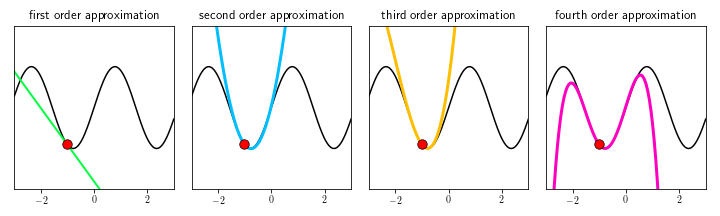
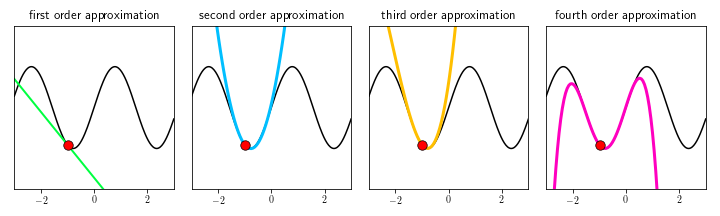
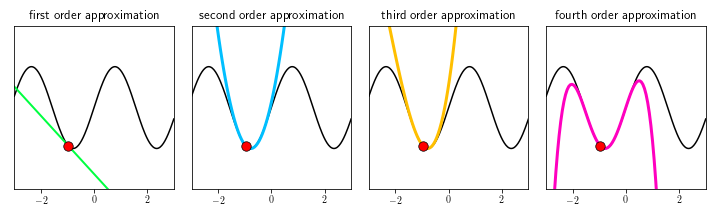
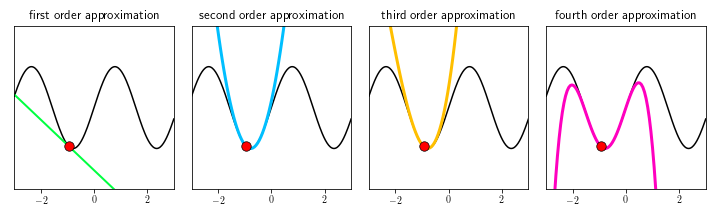
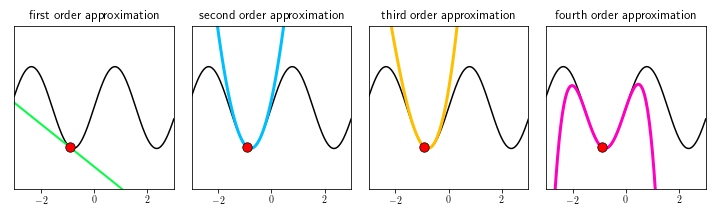
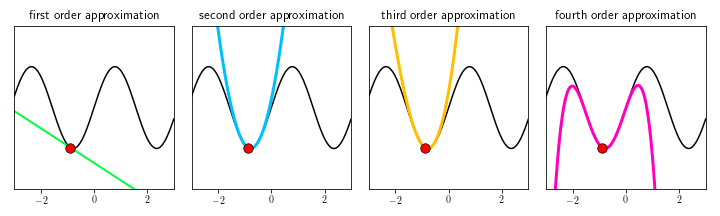
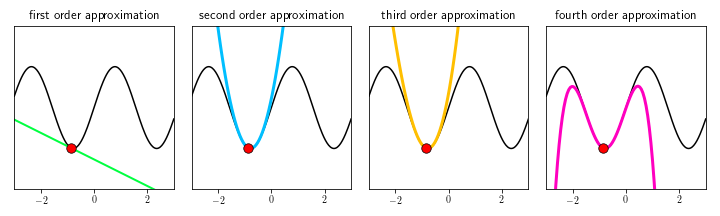
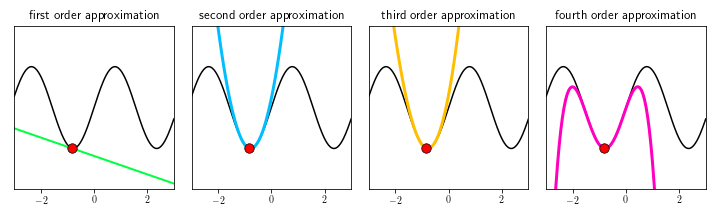
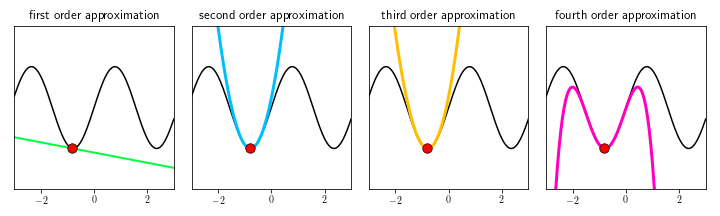
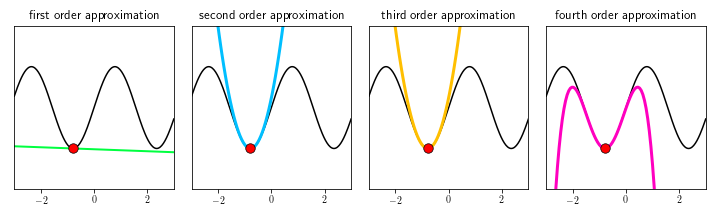
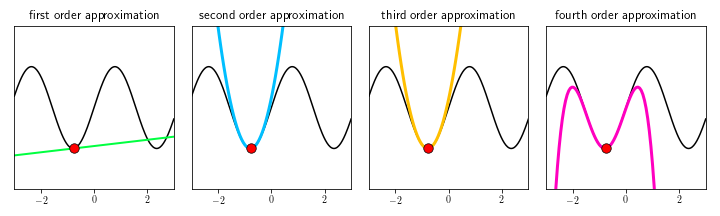
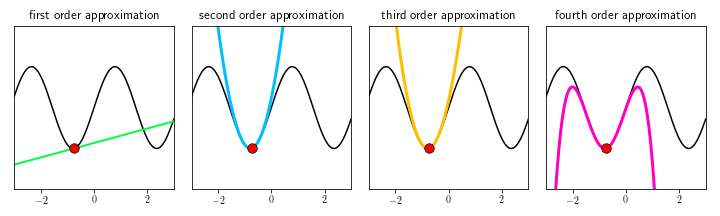
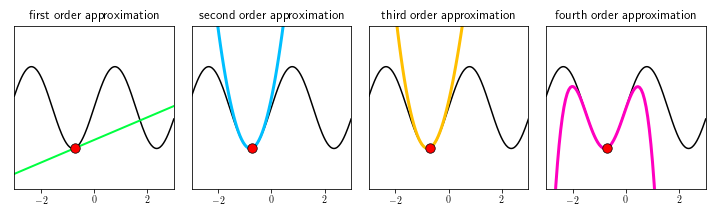
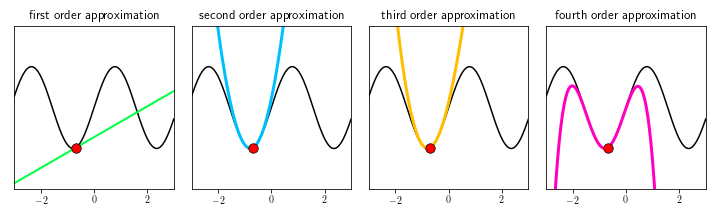
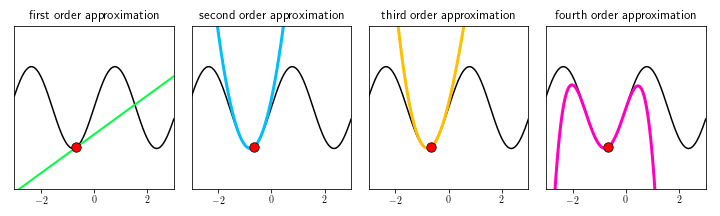
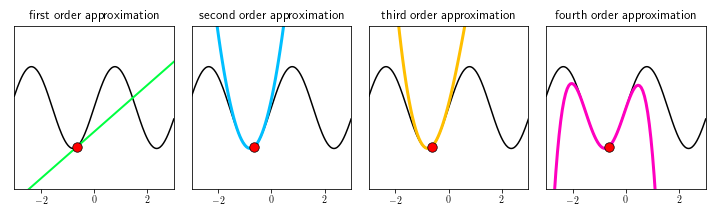
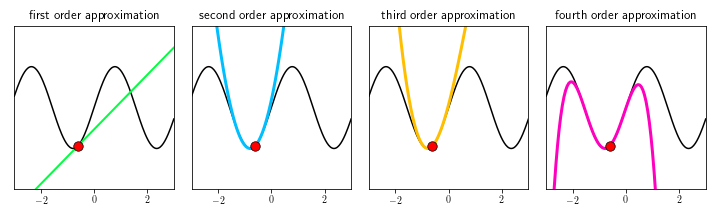
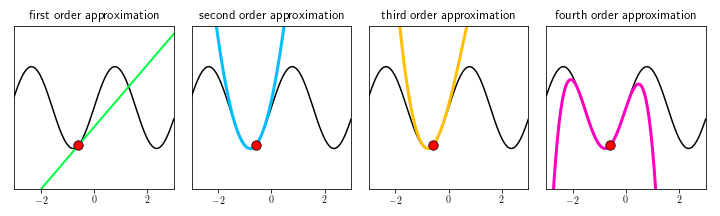
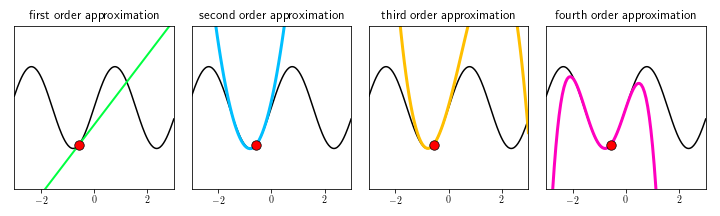
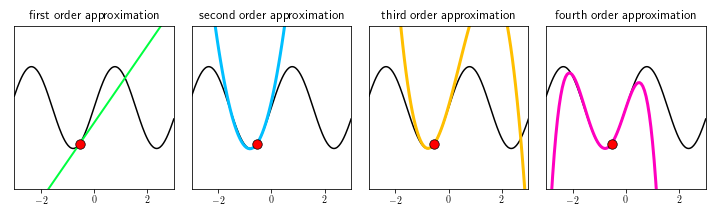
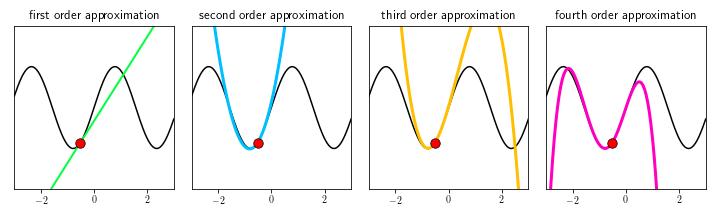
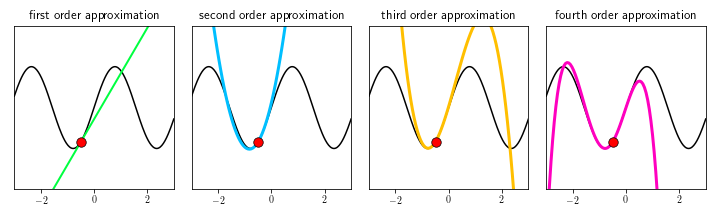
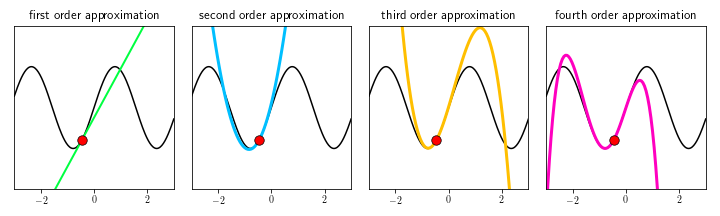
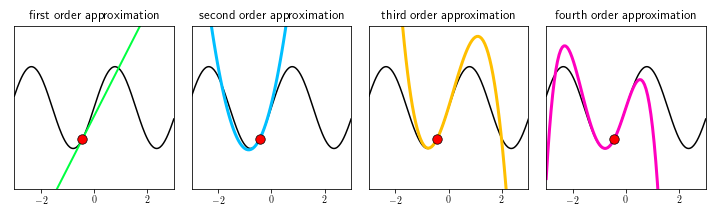
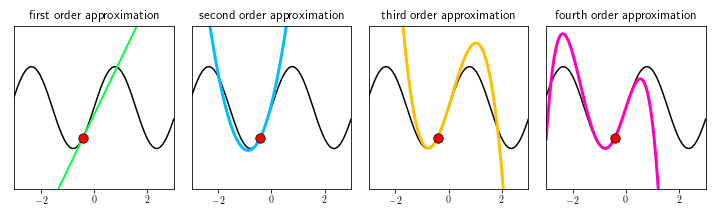
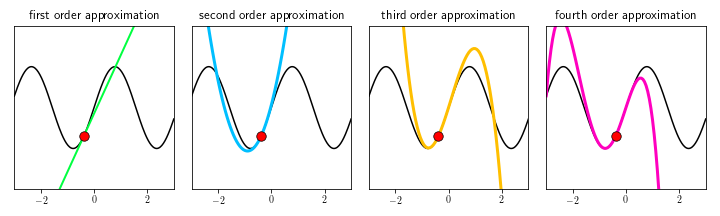
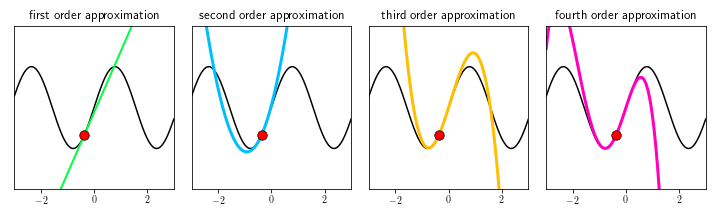
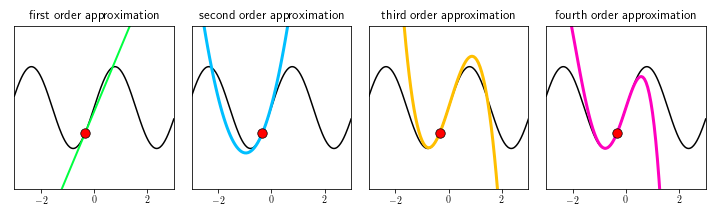
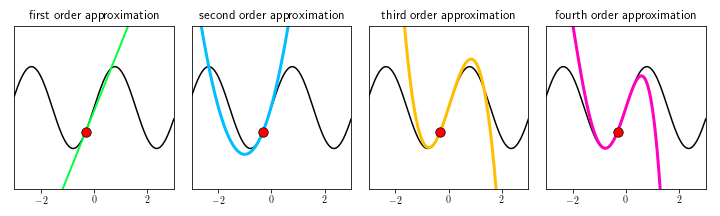
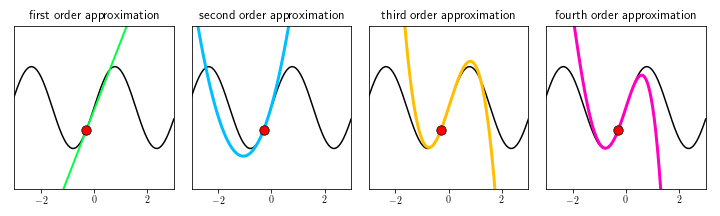
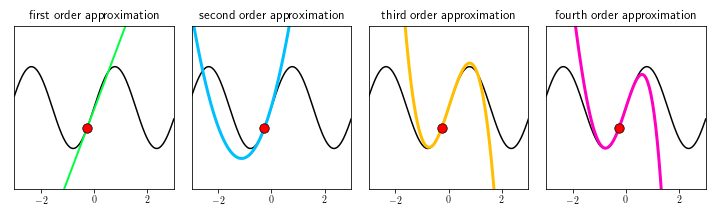
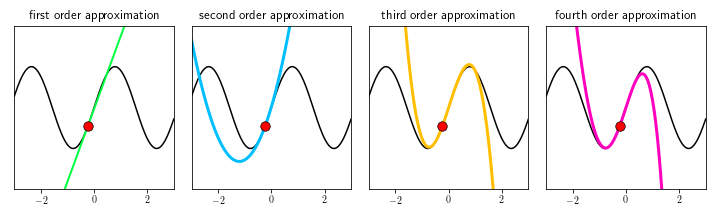
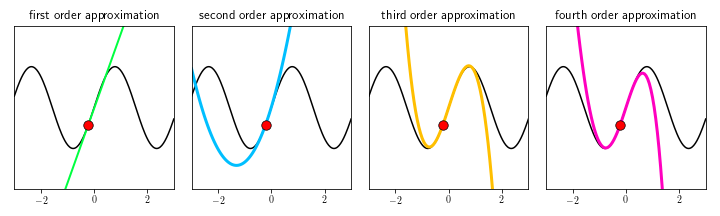
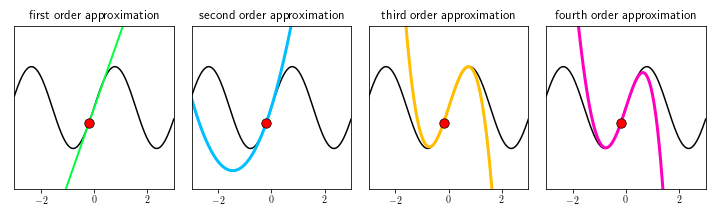
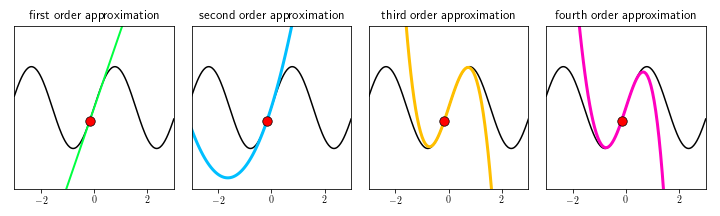
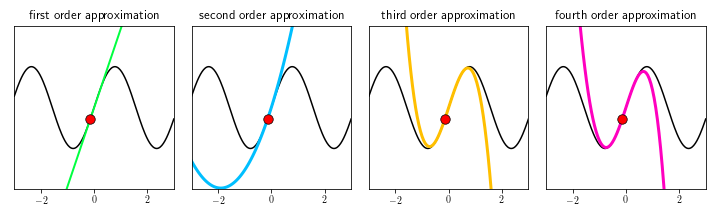
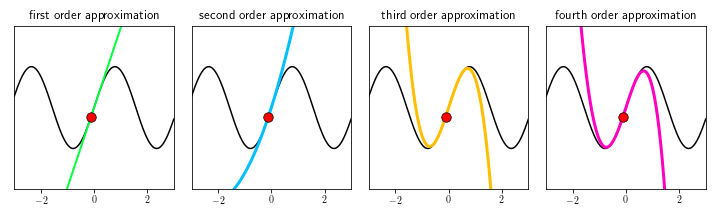
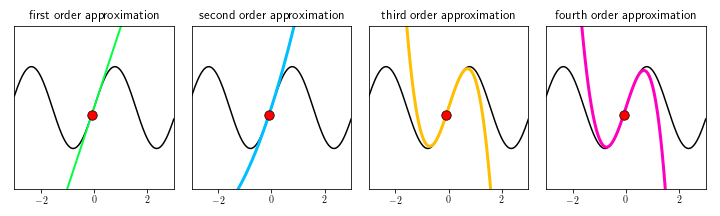
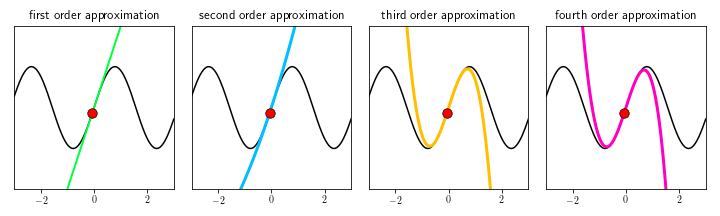
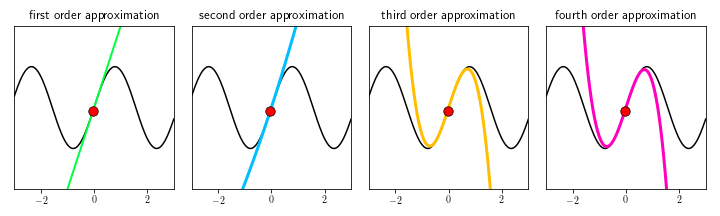
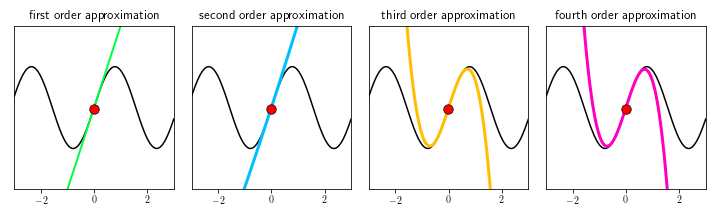
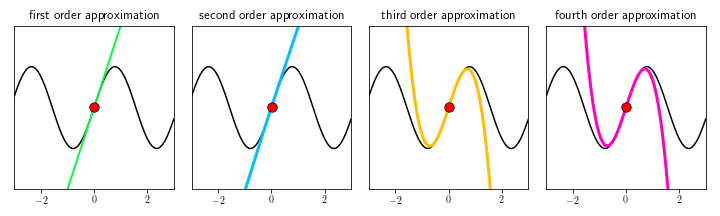
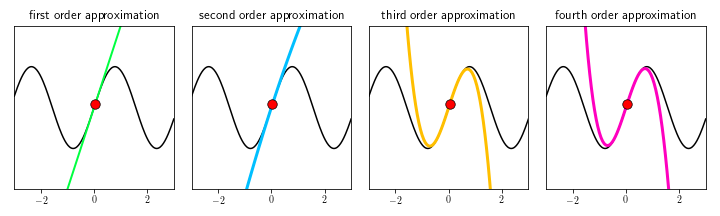
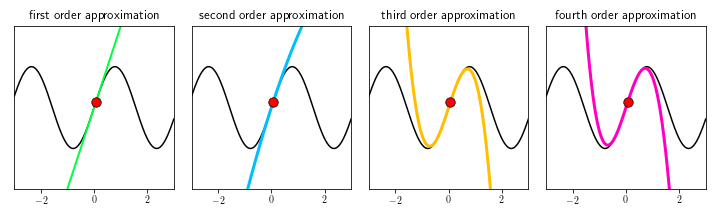
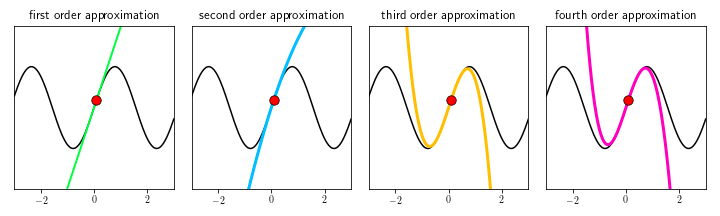
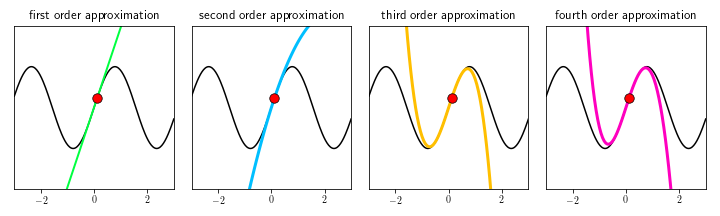
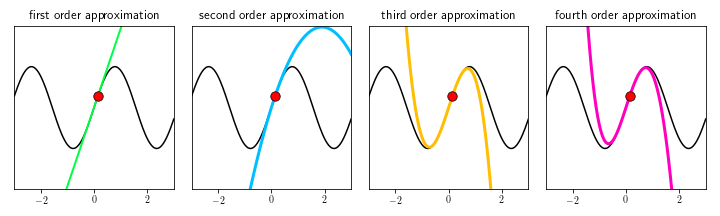
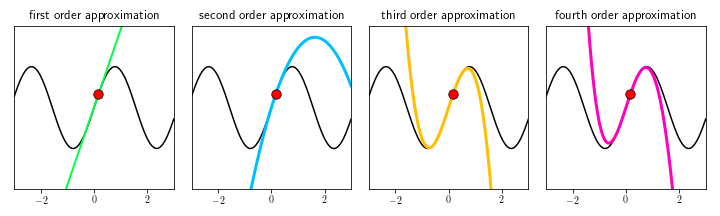
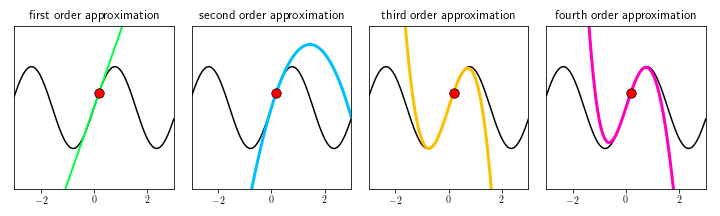
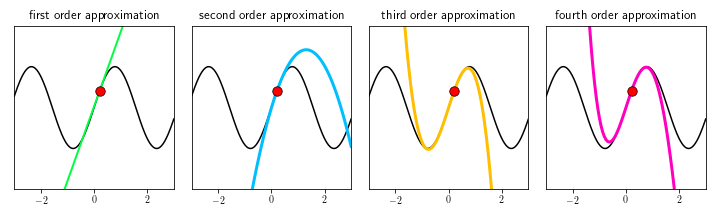
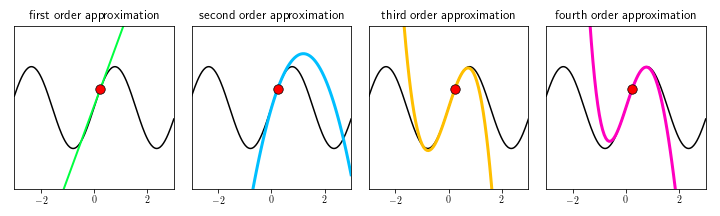
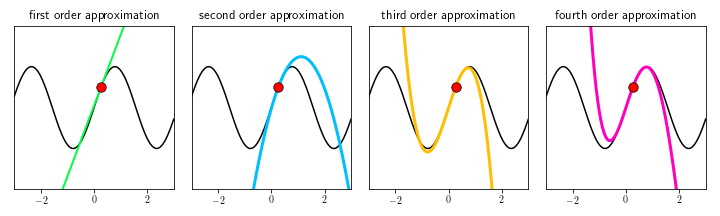
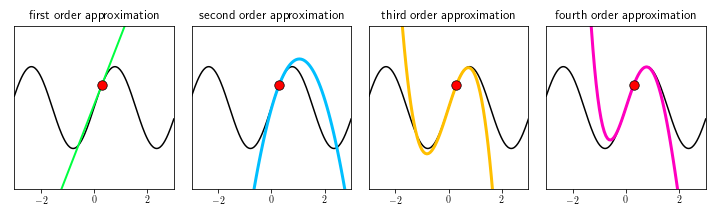
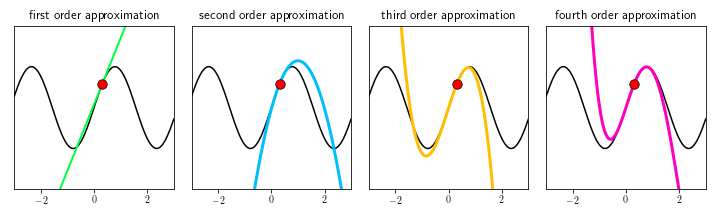
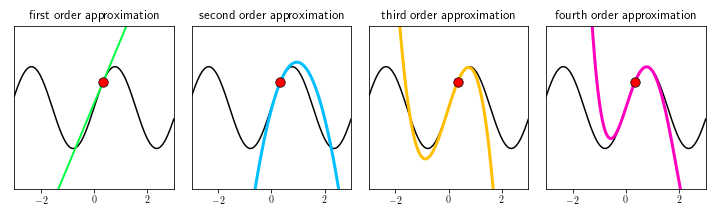
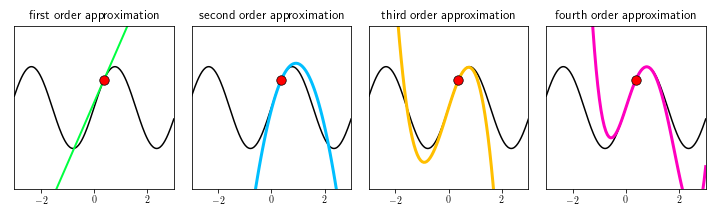
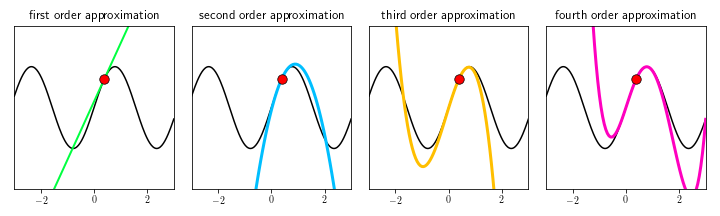
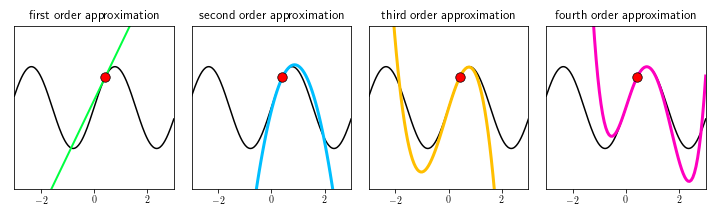
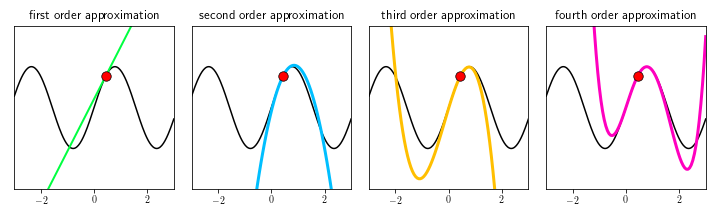
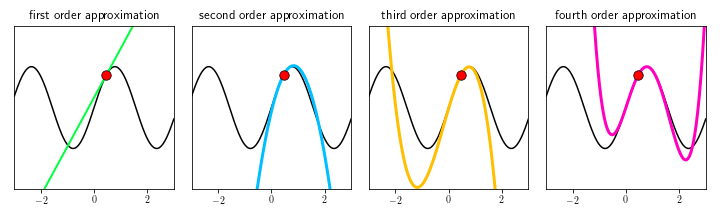
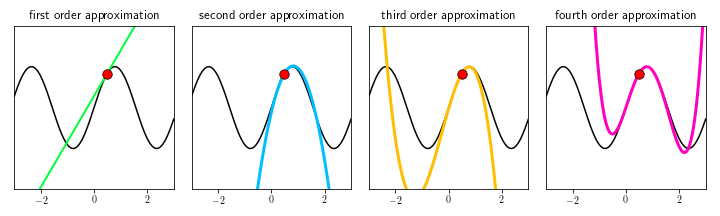
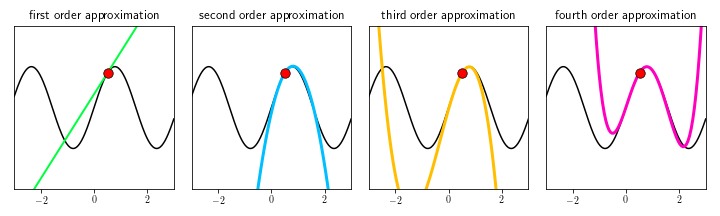
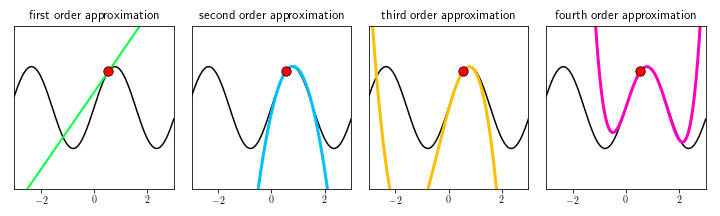
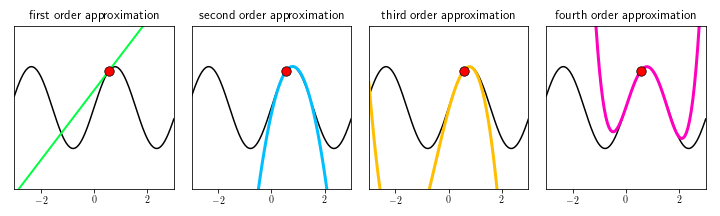
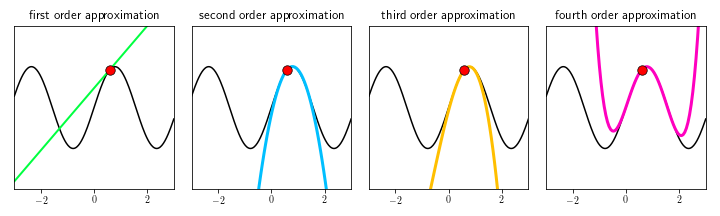
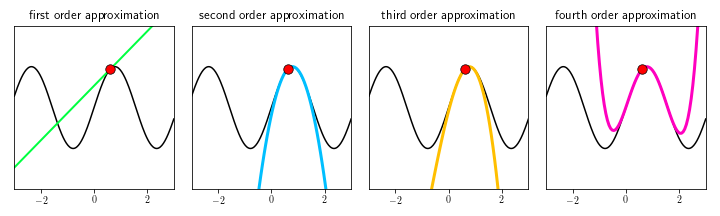
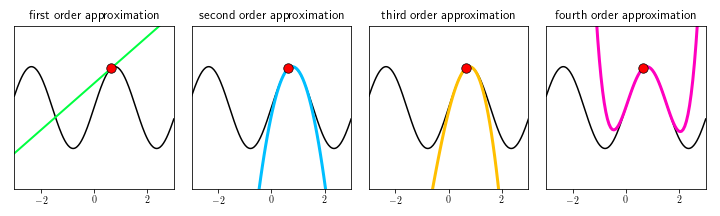
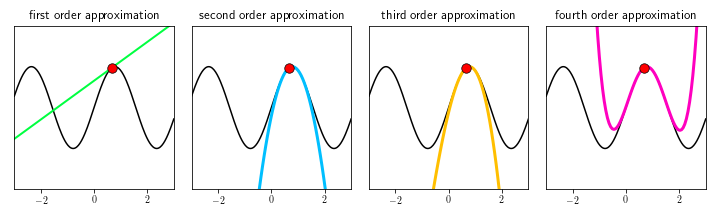
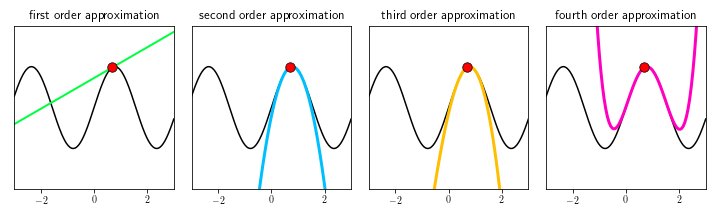
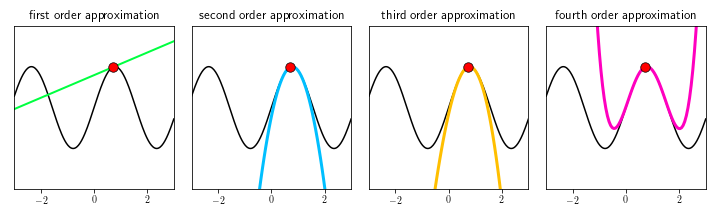
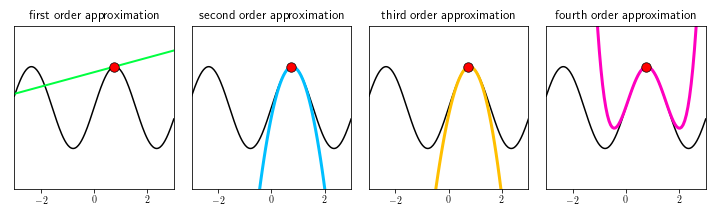
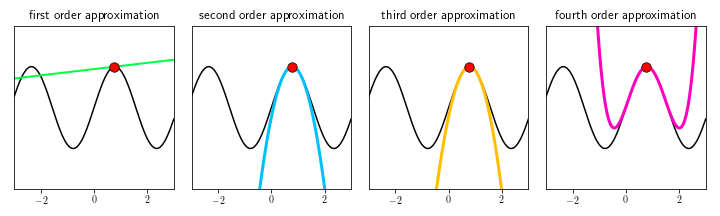
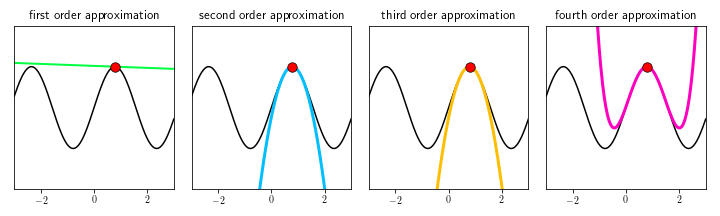
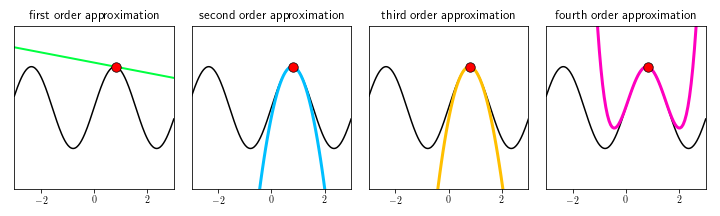
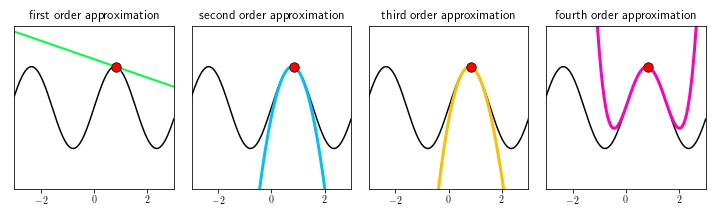
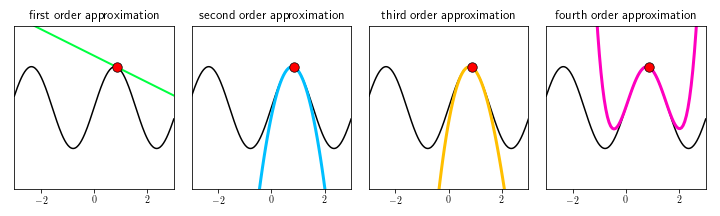
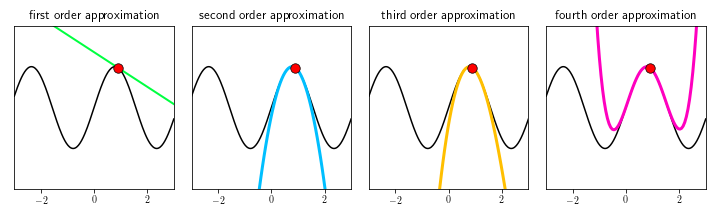
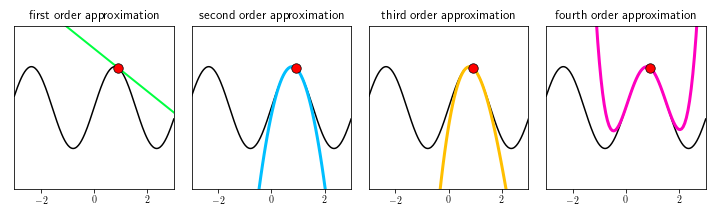
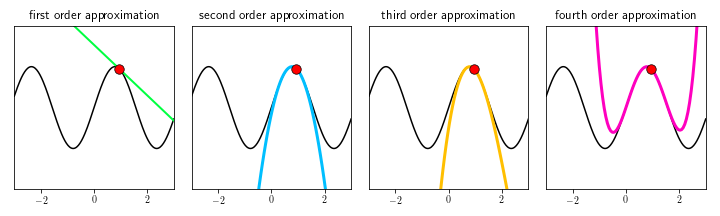
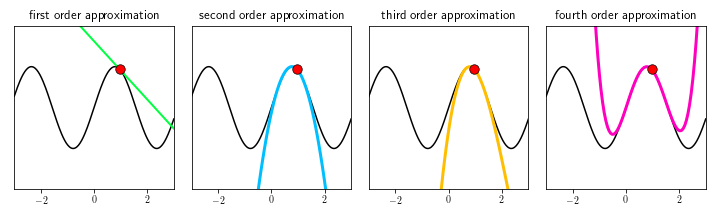
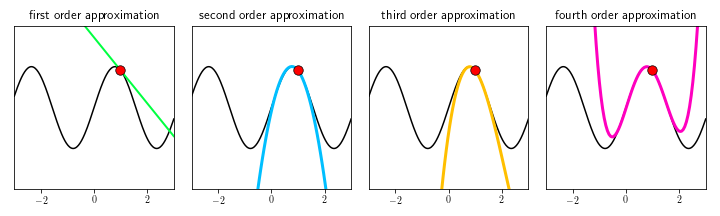
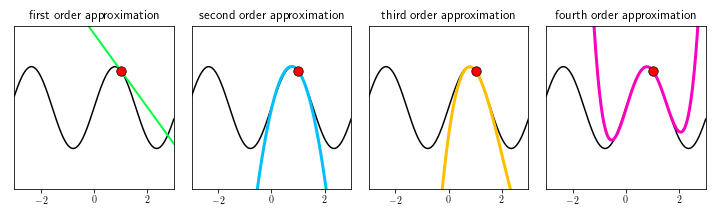
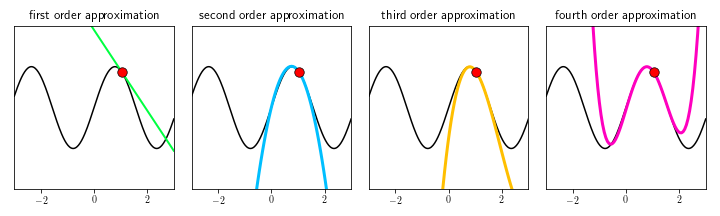
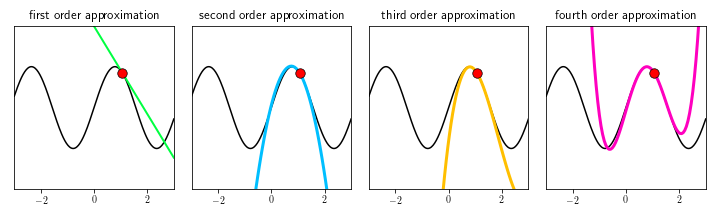
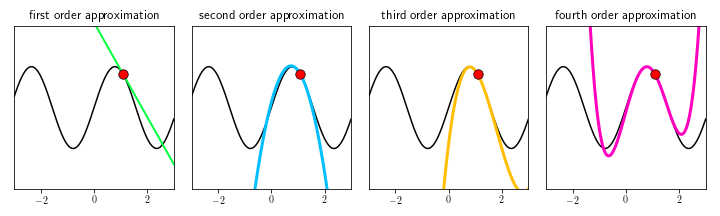
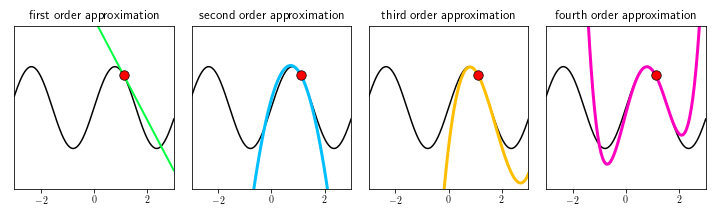
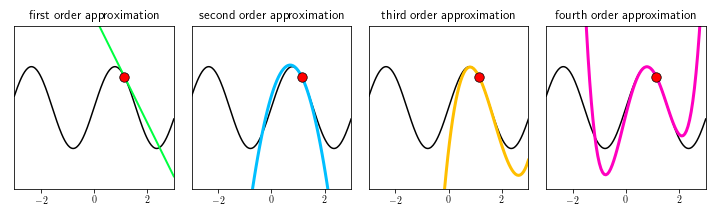
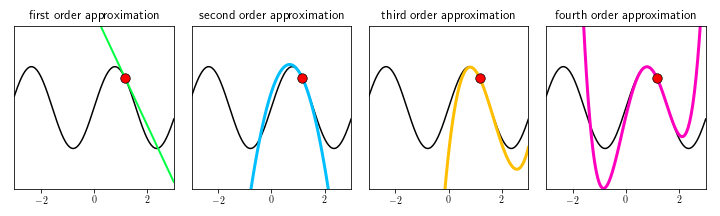
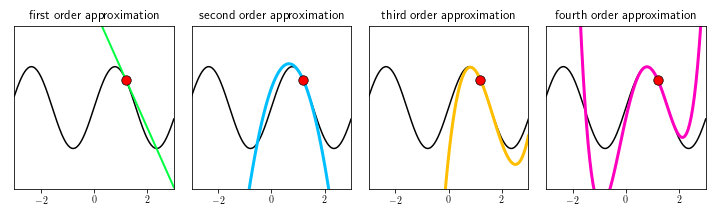
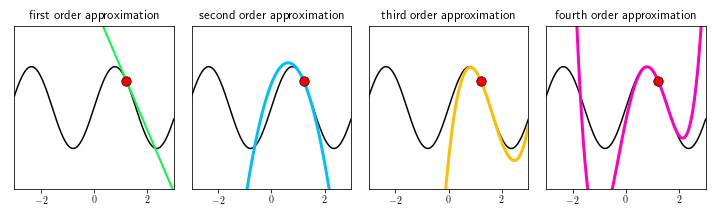
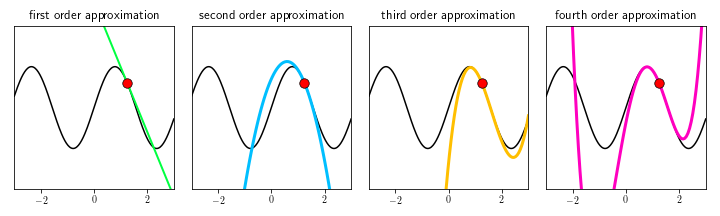
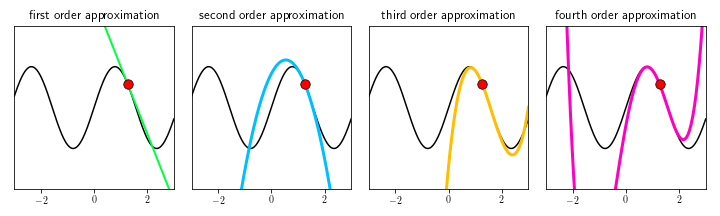
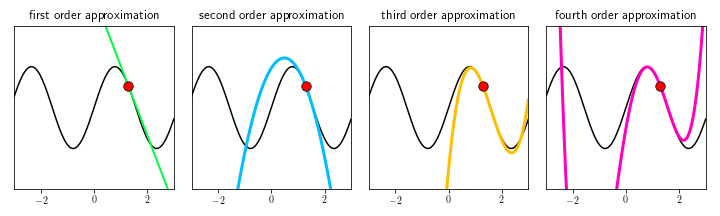
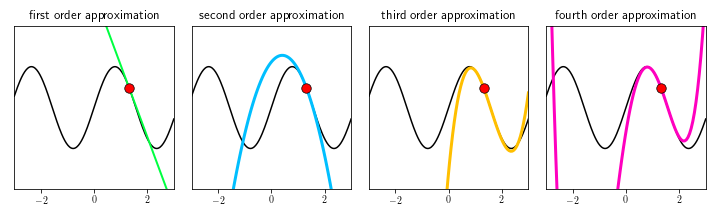
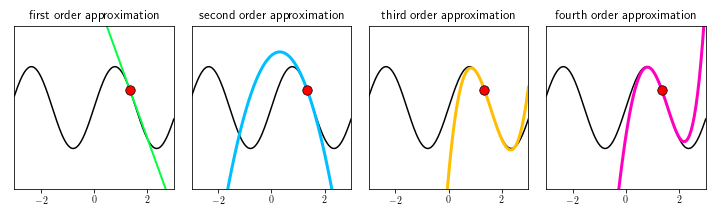
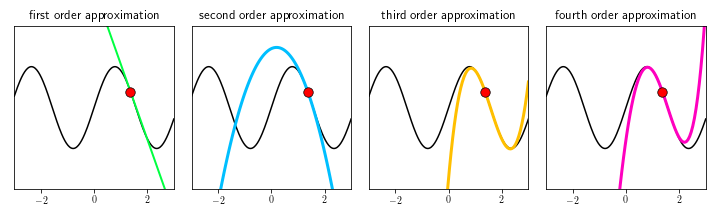
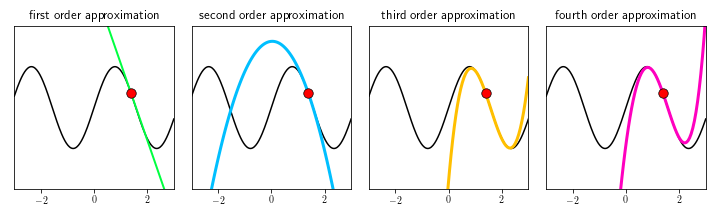
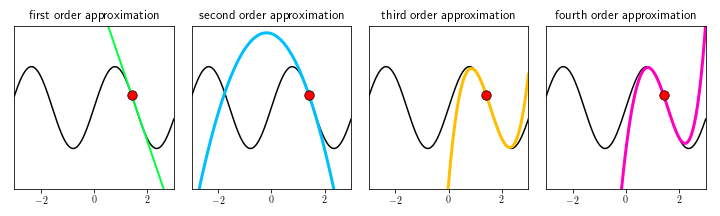
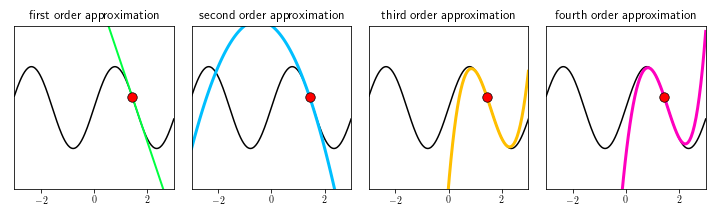
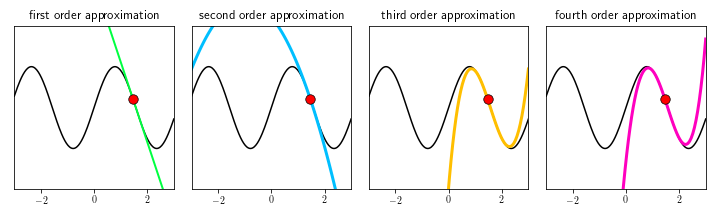
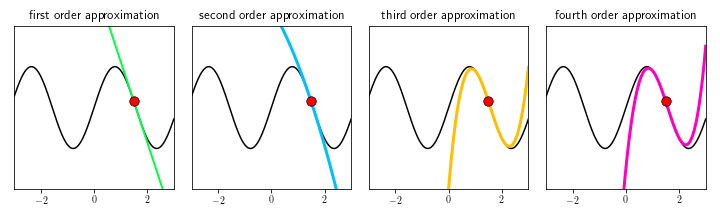
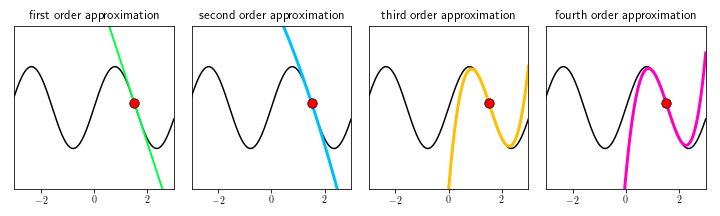
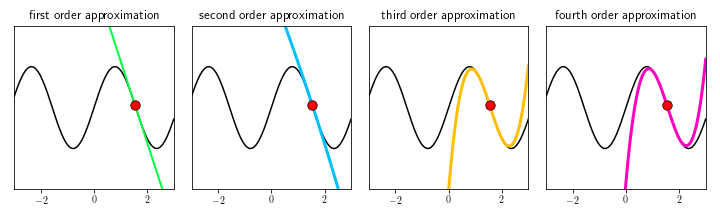
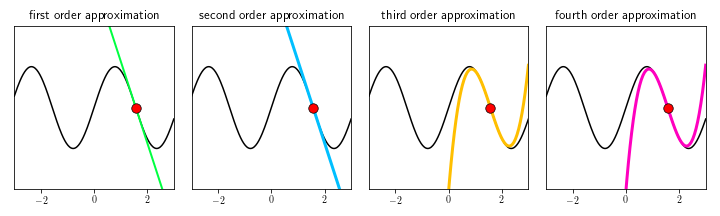
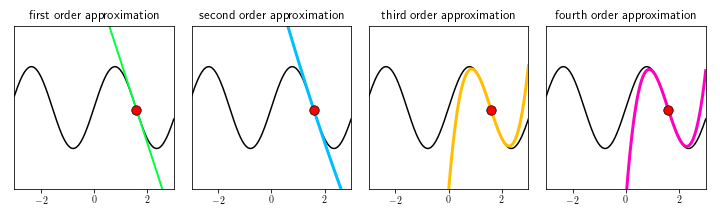
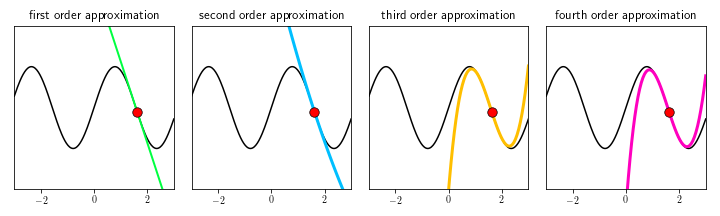
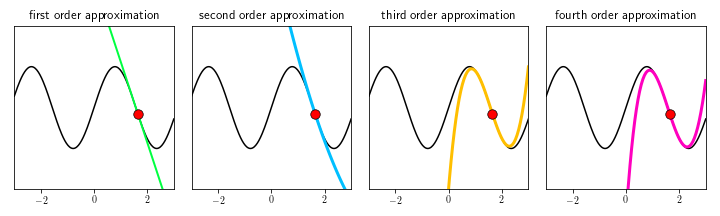
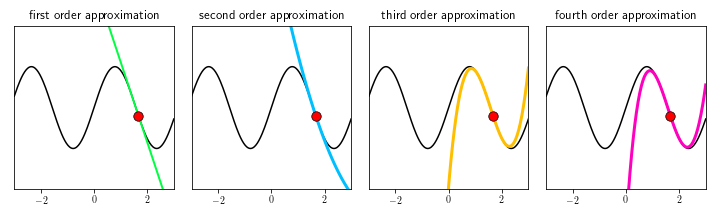
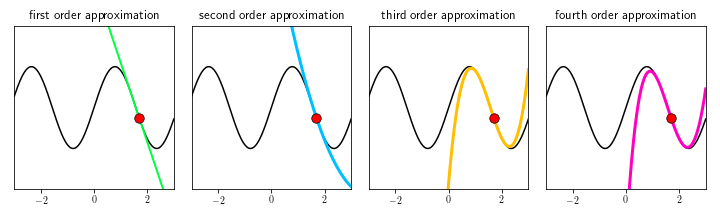
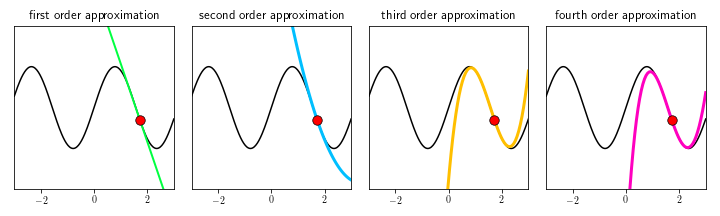
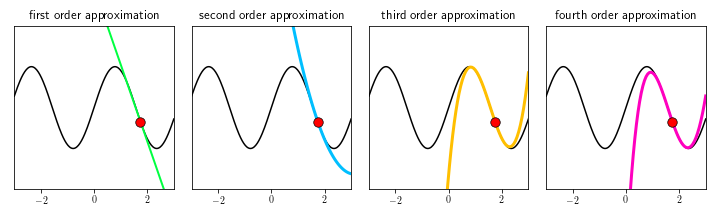
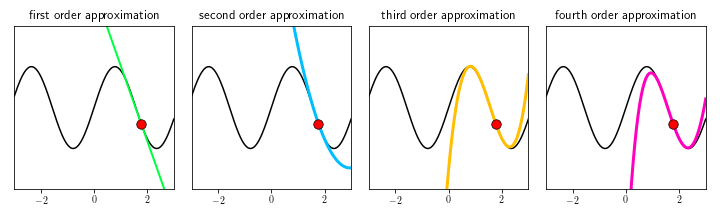
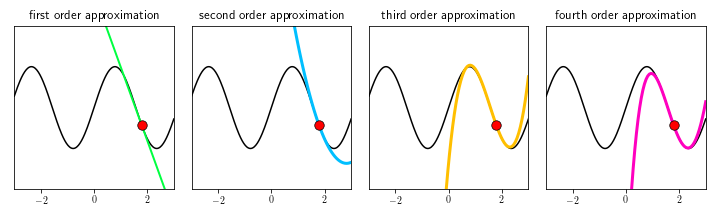
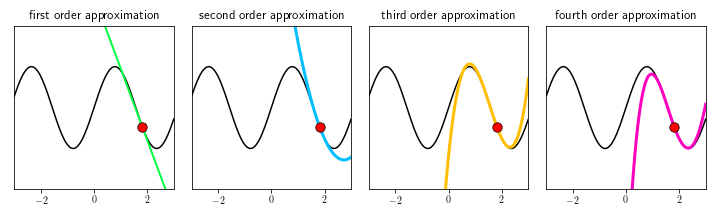
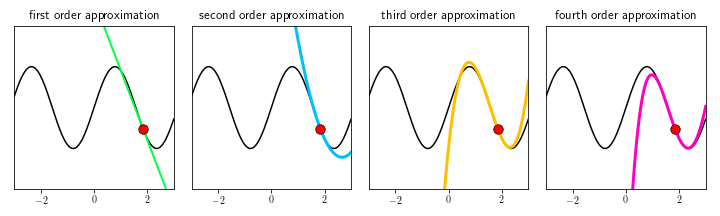
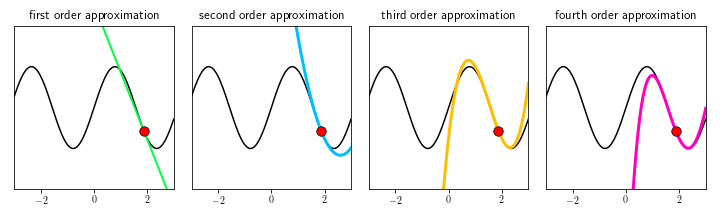
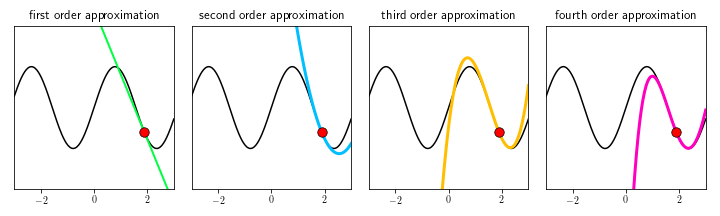
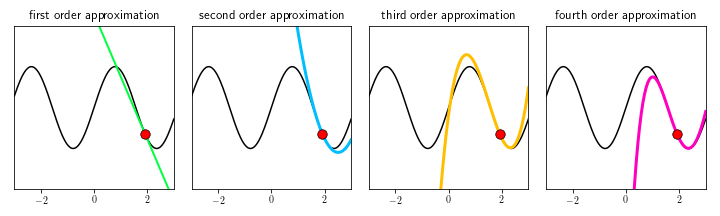
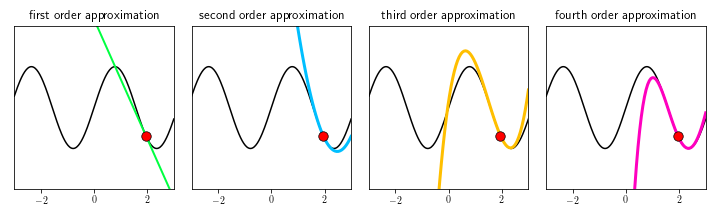
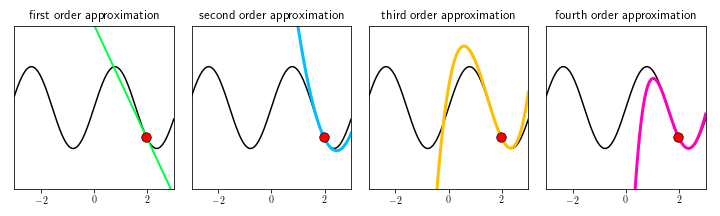
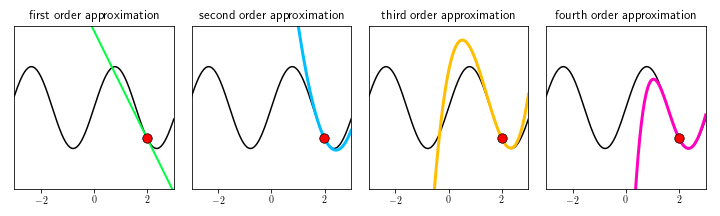
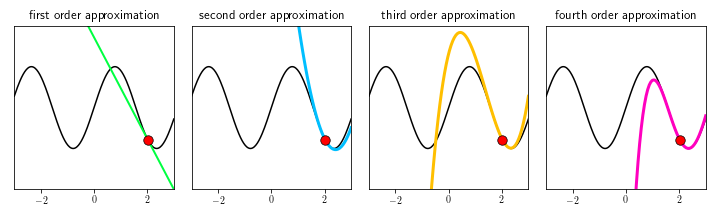
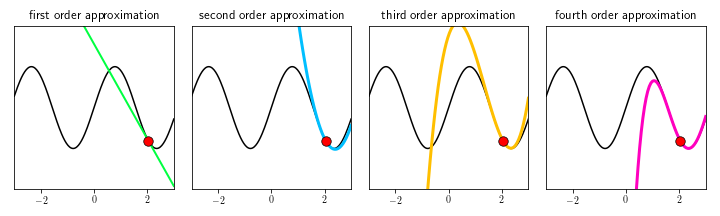
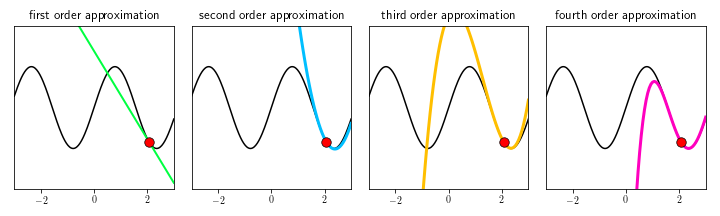
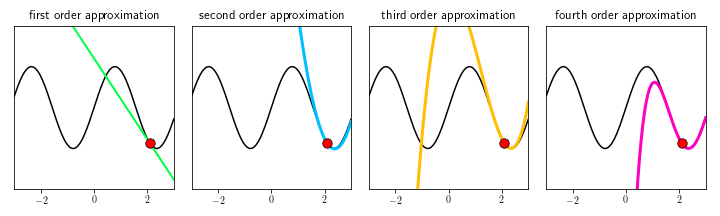
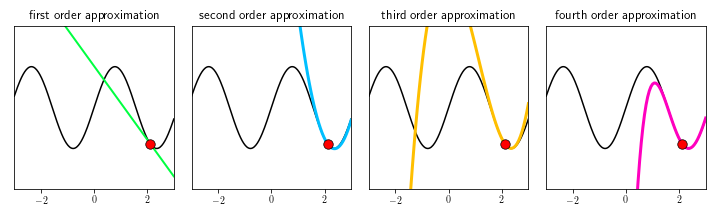
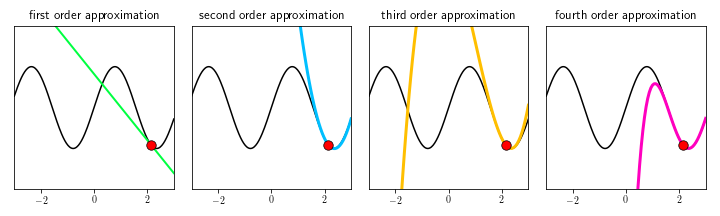
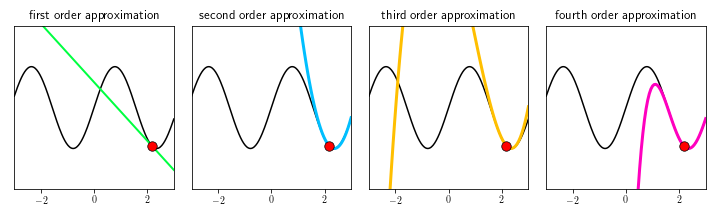
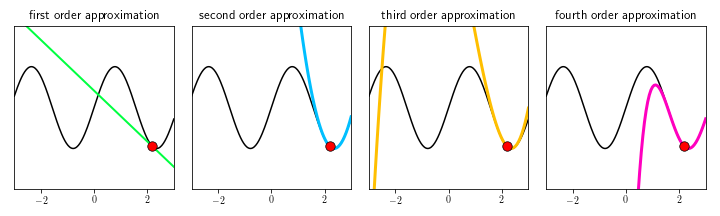
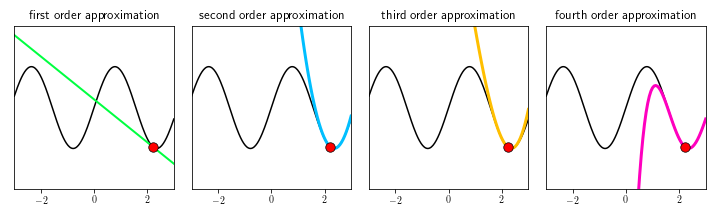
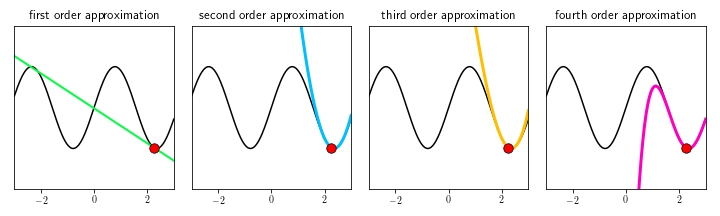
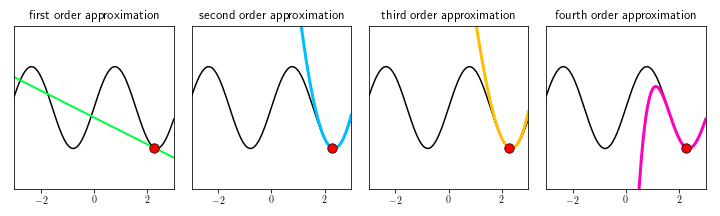
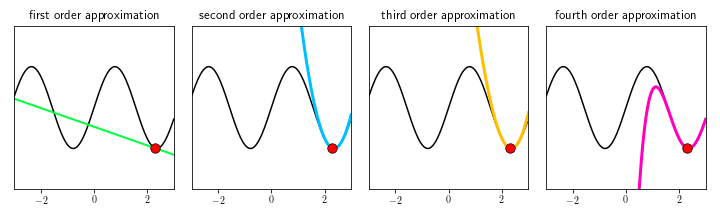
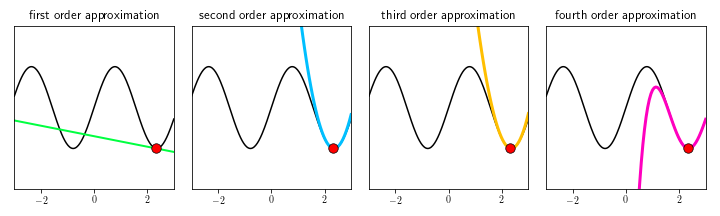
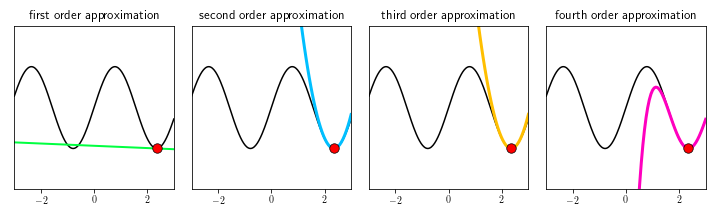
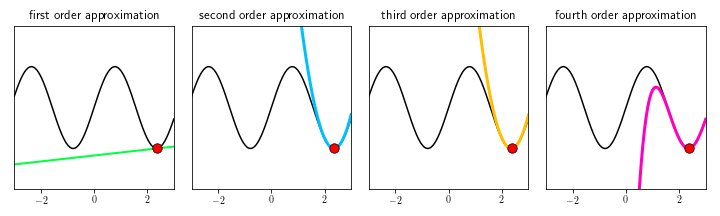
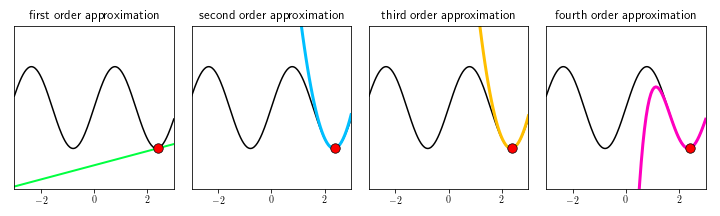
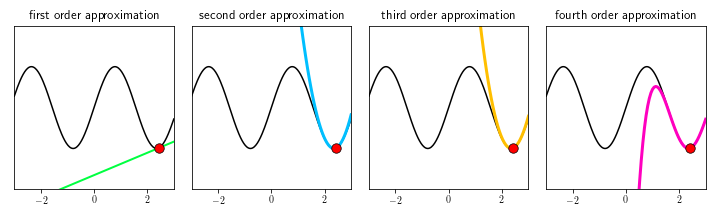
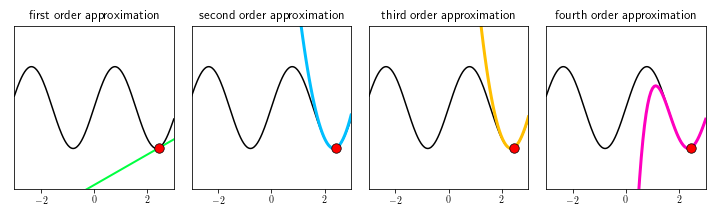
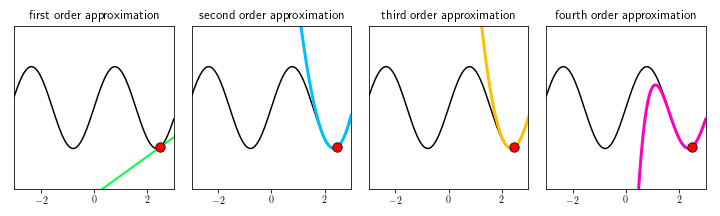
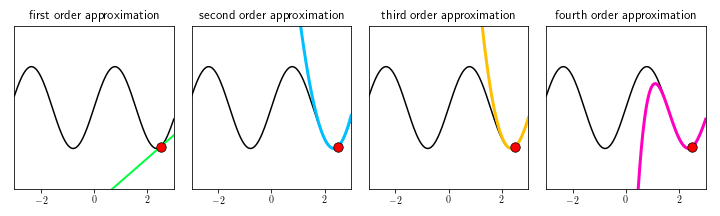

In [12]:
# what function should we play with?  Defined in the next line.
g = lambda w: np.sin(2*w)

# create an instance of the visualizer with this function 
taylor_viz = calclib.taylor_series_simultaneous_approximations.visualizer(g = g)

# run the visualizer for our chosen input function
taylor_viz.draw_it(num_frames = 200)

Examining this figure we can clearly see that the approximation becomes better and better as we increase $N$.  This makes sense, as each polynomial matches the underlying function at a point as we increase the degree.  However we can never expect it to match the entire function everywhere: we build each polynomial to match $g$ at only a single point, so regardless of degree we can only expect it to match the underlying function near the point $w_0$. 

## 4.1.4 The Taylor Series as a local function approximator

This idea of using a simple function in order to better understand another (potentially more complex) function is the germ of a centuries old area of mathematics called *function approximation*.  In the parlance of function approximation what we have done here with the Taylor Series  is to make a *approximation* to a function *locally at a point*.  Throughout our study of machine learning / deep learning we will see the notion of function approximation pop up in a number of contexts.